In [1]:
from statsbombpy import sb
df = sb.competitions()
import pandas as pd
import numpy as np

/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [2]:
df

competition_id  season_id              country_name  \
0               16          4                    Europe   
1               16          1                    Europe   
2               16          2                    Europe   
3               16         27                    Europe   
4               16         26                    Europe   
5               16         25                    Europe   
6               16         24                    Europe   
7               16         23                    Europe   
8               16         22                    Europe   
9               16         21                    Europe   
10              16         41                    Europe   
11              16         39                    Europe   
12              16         37                    Europe   
13              16         44                    Europe   
14              16         76                    Europe   
15              37         90                   England   
16              37         42                   England   
17              37          4                   England   
18              43        106             International   
19              43          3             International   
20            1238        108                     India   
21              11         90                     Spain   
22              11         42                     Spain   
23              11          4                     Spain   
24              11          1                     Spain   
25              11          2                     Spain   
26              11         27                     Spain   
27              11         26                     Spain   
28              11         25                     Spain   
29              11         24                     Spain   
30              11         23                     Spain   
31              11         22                     Spain   
32              11         21                     Spain   
33              11         41                     Spain   
34              11         40                     Spain   
35              11         39                     Spain   
36              11         38                     Spain   
37              11         37                     Spain   
38              49          3  United States of America   
39               2         44                   England   
40              55         43                    Europe   
41              53        106                    Europe   
42              72         30             International   

           competition_name competition_gender  competition_youth  \
0          Champions League               male              False   
1          Champions League               male              False   
2          Champions League               male              False   
3          Champions League               male              False   
4          Champions League               male              False   
5          Champions League               male              False   
6          Champions League               male              False   
7          Champions League               male              False   
8          Champions League               male              False   
9          Champions League               male              False   
10         Champions League               male              False   
11         Champions League               male              False   
12         Champions League               male              False   
13         Champions League               male              False   
14         Champions League               male              False   
15  FA Women's Super League             female              False   
16  FA Women's Super League             female              False   
17  FA Women's Super League             female              False   
18           FIFA World Cup               male              False   
19           FIFA World Cup

In [3]:
df2 = df[df['competition_name'] == "Indian Super league"]

In [4]:
df['competition_name'].unique()

array(['Champions League', "FA Women's Super League", 'FIFA World Cup',
       'Indian Super league', 'La Liga', 'NWSL', 'Premier League',
       'UEFA Euro', "UEFA Women's Euro", "Women's World Cup"],
      dtype=object)

In [5]:
df2

competition_id  season_id country_name     competition_name  \
20            1238        108        India  Indian Super league   

   competition_gender  competition_youth  competition_international  \
20               male              False                      False   

   season_name               match_updated match_updated_360  \
20   2021/2022  2023-03-31T02:14:09.896947              None   

   match_available_360             match_available  
20                None  2023-03-31T02:14:09.896947

In [6]:
## filtering out all the matches that are of Indian Super League
df2 = sb.matches(competition_id=1238, season_id=108)

/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [7]:
df_ISL_events = pd.DataFrame()

In [8]:
df_ISL_events = []  # Initialize the list to store events

for i in df2['match_id']:
    events = sb.events(match_id=i)
    df_ISL_events.append(events)

# After the loop, you can convert the list to a DataFrame if required
df_events = pd.concat(df_ISL_events, ignore_index=True)

/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.

KeyboardInterrupt: 

In [ ]:
df_events

In [ ]:
len(df_ISL_events)

In [9]:
events = sb.events(match_id='3827767')

In [10]:
from mplsoccer import Sbopen

# instantiate a parser object
parser = Sbopen()

In [11]:
df_event, df_related, df_freeze, df_tactics = parser.event(3827767)

# exploring the data
df_event.info()
df_related.info()
df_freeze.info()
df_tactics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4096 non-null   object 
 1   index                           4096 non-null   int64  
 2   period                          4096 non-null   int64  
 3   timestamp                       4096 non-null   object 
 4   minute                          4096 non-null   int64  
 5   second                          4096 non-null   int64  
 6   possession                      4096 non-null   int64  
 7   duration                        3100 non-null   float64
 8   match_id                        4096 non-null   int64  
 9   type_id                         4096 non-null   int64  
 10  type_name                       4096 non-null   object 
 11  possession_team_id              4096 non-null   int64  
 12  possession_team_name            40

In [12]:
df_event.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'outcome_id', 'outcome_name',
       'counterpress', 'under_pressure', 'dribble_overrun', 'pass_cross',
       'pass_cut_back', 'off_camera', 'out', 'aerial_won', 'pass_switch',
       'ball_recovery_recovery_failure', 'foul_committed_card_id',
       'foul_committed_card_name', 'technique_id', 'technique_name',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_statsbomb_xg',
       'end_z', 'shot_key_pass_id', 'goal

In [13]:
df_event

id  index  period        timestamp  \
0     c9e9f330-477c-460b-9579-5a29225ed31c      1       1         00:00:00   
1     3e7ff622-8281-4f4e-95b6-4ed1187878af      2       1         00:00:00   
2     5309e6c3-1db5-4294-9640-6ee60654aca3      3       1         00:00:00   
3     dda59477-eb39-4c32-bb88-71cda6895d5b      4       1         00:00:00   
4     a4a578a0-5856-409c-b311-5273f832090e   1613       1  00:00:00.192000   
...                                    ...    ...     ...              ...   
4091  6202e979-dd31-412d-b1a6-5b1590143c04   4092       5  00:08:01.119000   
4092  ca85fa2e-f0d2-4fc1-8d33-cc96099a62f0   4093       5  00:08:58.988000   
4093  081ff8a4-39d5-4ba0-bf1d-c5849e52826f   4094       5  00:08:59.538000   
4094  7fc8b4aa-674c-4fd8-b271-e34cbea31412   4095       5  00:09:35.847000   
4095  ff9a7f3b-c8f6-4775-a387-532ef3590137   4096       5  00:09:35.847000   

      minute  second  possession  duration  match_id  type_id  ...  \
0          0       0           1  0.000000   3827767       35  ...   
1          0       0           1  0.000000   3827767       35  ...   
2          0       0           1  0.000000   3827767       18  ...   
3          0       0           1  0.000000   3827767       18  ...   
4          0       0          96       NaN   3827767       42  ...   
...      ...     ...         ...       ...       ...      ...  ...   
4091     128       1         261  0.000000   3827767       23  ...   
4092     128      58         262  0.550509   3827767       16  ...   
4093     128      59         262  0.000000   3827767       23  ...   
4094     129      35         262  0.000000   3827767       34  ...   
4095     129      35         262  0.000000   3827767       34  ...   

     shot_one_on_one  pass_deflected pass_goal_assist  pass_no_touch  \
0                NaN             NaN              NaN            NaN   
1                NaN             NaN              NaN            NaN   
2                NaN             NaN              NaN            NaN   
3                NaN             NaN              NaN            NaN   
4                NaN             NaN              NaN            NaN   
...              ...             ...              ...            ...   
4091             NaN             NaN              NaN            NaN   
4092             NaN             NaN              NaN            NaN   
4093             NaN             NaN              NaN            NaN   
4094             NaN             NaN              NaN            NaN   
4095             NaN             NaN              NaN            NaN   

     block_offensive  block_deflection injury_stoppage_in_chain  \
0                NaN               NaN                      NaN   
1                NaN               NaN                      NaN   
2                NaN               NaN                      NaN   
3                NaN               NaN                      NaN   
4                NaN               NaN                      NaN   
...              ...               ...                      ...   
4091             NaN               NaN                      NaN   
4092             NaN               NaN                      NaN   
4093             NaN               NaN                      NaN   
4094             NaN               NaN                      NaN   
4095             NaN               NaN                      NaN   

      block_save_block  foul_committed_advantage foul_won_advantage  
0                  NaN                       NaN                NaN  
1                  NaN                       NaN                NaN  
2                  NaN                       NaN                NaN  
3                  NaN                       NaN                NaN  
4                  NaN                       NaN                NaN  
...                ...                       ...                ...  
4091               NaN                       NaN                NaN  
4092               NaN          

In [14]:
df_event2 = parser.event(3827767)[0]

In [15]:
df_event2

id  index  period        timestamp  \
0     c9e9f330-477c-460b-9579-5a29225ed31c      1       1         00:00:00   
1     3e7ff622-8281-4f4e-95b6-4ed1187878af      2       1         00:00:00   
2     5309e6c3-1db5-4294-9640-6ee60654aca3      3       1         00:00:00   
3     dda59477-eb39-4c32-bb88-71cda6895d5b      4       1         00:00:00   
4     a4a578a0-5856-409c-b311-5273f832090e   1613       1  00:00:00.192000   
...                                    ...    ...     ...              ...   
4091  6202e979-dd31-412d-b1a6-5b1590143c04   4092       5  00:08:01.119000   
4092  ca85fa2e-f0d2-4fc1-8d33-cc96099a62f0   4093       5  00:08:58.988000   
4093  081ff8a4-39d5-4ba0-bf1d-c5849e52826f   4094       5  00:08:59.538000   
4094  7fc8b4aa-674c-4fd8-b271-e34cbea31412   4095       5  00:09:35.847000   
4095  ff9a7f3b-c8f6-4775-a387-532ef3590137   4096       5  00:09:35.847000   

      minute  second  possession  duration  match_id  type_id  ...  \
0          0       0           1  0.000000   3827767       35  ...   
1          0       0           1  0.000000   3827767       35  ...   
2          0       0           1  0.000000   3827767       18  ...   
3          0       0           1  0.000000   3827767       18  ...   
4          0       0          96       NaN   3827767       42  ...   
...      ...     ...         ...       ...       ...      ...  ...   
4091     128       1         261  0.000000   3827767       23  ...   
4092     128      58         262  0.550509   3827767       16  ...   
4093     128      59         262  0.000000   3827767       23  ...   
4094     129      35         262  0.000000   3827767       34  ...   
4095     129      35         262  0.000000   3827767       34  ...   

     shot_one_on_one  pass_deflected pass_goal_assist  pass_no_touch  \
0                NaN             NaN              NaN            NaN   
1                NaN             NaN              NaN            NaN   
2                NaN             NaN              NaN            NaN   
3                NaN             NaN              NaN            NaN   
4                NaN             NaN              NaN            NaN   
...              ...             ...              ...            ...   
4091             NaN             NaN              NaN            NaN   
4092             NaN             NaN              NaN            NaN   
4093             NaN             NaN              NaN            NaN   
4094             NaN             NaN              NaN            NaN   
4095             NaN             NaN              NaN            NaN   

     block_offensive  block_deflection injury_stoppage_in_chain  \
0                NaN               NaN                      NaN   
1                NaN               NaN                      NaN   
2                NaN               NaN                      NaN   
3                NaN               NaN                      NaN   
4                NaN               NaN                      NaN   
...              ...               ...                      ...   
4091             NaN               NaN                      NaN   
4092             NaN               NaN                      NaN   
4093             NaN               NaN                      NaN   
4094             NaN               NaN                      NaN   
4095             NaN               NaN                      NaN   

      block_save_block  foul_committed_advantage foul_won_advantage  
0                  NaN                       NaN                NaN  
1                  NaN                       NaN                NaN  
2                  NaN                       NaN                NaN  
3                  NaN                       NaN                NaN  
4                  NaN                       NaN                NaN  
...                ...                       ...                ...  
4091               NaN                       NaN                NaN  
4092               NaN          

In [16]:
df_ISL_events = []  # Initialize the list to store events

for i in df2['match_id']:
    events = parser.event(i)[0]
    df_ISL_events.append(events)

# After the loop, you can convert the list to a DataFrame if required
df_events = pd.concat(df_ISL_events, ignore_index=True)

In [17]:
df_events['match_id'].unique()

array([3827767, 3827335, 3827336, 3827338, 3827337, 3817856, 3817891,
       3817870, 3817899, 3817866, 3817889, 3817887, 3817872, 3817900,
       3817855, 3817863, 3817877, 3817901, 3817880, 3817902, 3817862,
       3817873, 3817869, 3817881, 3817895, 3817884, 3817896, 3817852,
       3817883, 3817886, 3817864, 3817882, 3817894, 3817871, 3817861,
       3817888, 3817875, 3817868, 3817867, 3813313, 3817890, 3813302,
       3817857, 3817898, 3817893, 3817854, 3817892, 3817859, 3817858,
       3817897, 3817885, 3817878, 3817876, 3813305, 3813266, 3813271,
       3813311, 3813303, 3813304, 3813306, 3813283, 3813275, 3813278,
       3813295, 3813296, 3813282, 3813269, 3817879, 3817874, 3817865,
       3817860, 3817853, 3817851, 3817850, 3817849, 3817848, 3813318,
       3813287, 3813270, 3813307, 3813279, 3813281, 3813274, 3813285,
       3813317, 3813316, 3813315, 3813314, 3813312, 3813310, 3813309,
       3813308, 3813301, 3813300, 3813299, 3813298, 3813297, 3813294,
       3813293, 3813

## Now we will start data preparation step for creating xG chain for Indian Super League

In [ ]:
df_events.columns

## The posession chain should already be isolated, let's verify that for a single match

In [ ]:
df_filtered = df_events[df_events['match_id'] == 3817875]


In [ ]:
df2 = df_filtered[['possession_team_name','team_name','x','y','end_x','end_y','type_name','possession','outcome_name','timestamp','player_name','sub_type_name','pass_recipient_name']]

In [ ]:
df2.head(55)

#### we can see that the posession chain is isolated properly

In [ ]:
df2['type_name'].unique()

In [ ]:
df3 = df_filtered[df_filtered['type_name'] == 'Shot']

In [ ]:
df3 = df3[['possession_team_name','team_name','x','y','end_x','end_y','type_name','possession','outcome_name','timestamp','player_name','sub_type_name','pass_recipient_name','shot_statsbomb_xg']]

In [ ]:
df3

#### we will filter df2 to get all events of passes and goals

In [69]:
df_passes_shots = df_events[(df_events['type_name'] == 'Shot') | (df_events['type_name'] == 'Pass') | (df_events['type_name'] == 'Carry')]


In [70]:
df_passes_shots

id  index  period        timestamp  \
5       75bd307e-271e-4d65-97a1-3f5d43361eb8      5       1  00:00:01.886000   
7       3cb09ff4-fb39-49ad-a451-20c7675151f5      7       1  00:00:03.529000   
8       eea2643a-54d3-475b-917d-8441303854a7      8       1  00:00:05.201000   
9       2d464a33-a587-4e45-bfc5-35de0eae4d40      9       1  00:00:06.628000   
11      76287ee7-7212-42e7-93af-5924122fbe66     11       1  00:00:08.761000   
...                                      ...    ...     ...              ...   
344655  9bbbf776-671e-4bd9-a6bb-e8b38c682fe6   3061       2  00:49:35.106000   
344659  fdea2931-378e-48dc-b2b9-161934906a22   3065       2  00:49:36.224000   
344662  73298cd6-9627-47e6-8d09-1ac63ac9e5ee   3068       2  00:50:04.509000   
344664  83c5be5a-8ab7-4c9b-958f-5d9d8d417ff1   3070       2  00:50:44.366000   
344666  de20bd07-46f2-4b5c-9050-3bb409687702   3072       2  00:50:46.641000   

        minute  second  possession  duration  match_id  type_id  ...  \
5            0       1           2  1.643562   3827767       30  ...   
7            0       3           2  1.672124   3827767       43  ...   
8            0       5           2  1.427084   3827767       30  ...   
9            0       6           3  2.033153   3827767       30  ...   
11           0       8           3  0.812119   3827767       30  ...   
...        ...     ...         ...       ...       ...      ...  ...   
344655      94      35         183  1.118121   3813264       30  ...   
344659      94      36         183  0.279998   3813264       43  ...   
344662      95       4         184  2.134957   3813264       30  ...   
344664      95      44         185  2.235390   3813264       30  ...   
344666      95      46         185  1.439292   3813264       30  ...   

       shot_deflected  shot_open_goal ball_recovery_offensive  \
5                 NaN             NaN                     NaN   
7                 NaN             NaN                     NaN   
8                 NaN             NaN                     NaN   
9                 NaN             NaN                     NaN   
11                NaN             NaN                     NaN   
...               ...             ...                     ...   
344655            NaN             NaN                     NaN   
344659            NaN             NaN                     NaN   
344662            NaN             NaN                     NaN   
344664            NaN             NaN                     NaN   
344666            NaN             NaN                     NaN   

        pass_miscommunication player_off_permanent  dribble_no_touch  \
5                         NaN                  NaN               NaN   
7                         NaN                  NaN               NaN   
8                         NaN                  NaN               NaN   
9                         NaN                  NaN               NaN   
11                        NaN                  NaN               NaN   
...                       ...                  ...               ...   
344655                    NaN                  NaN               NaN   
344659                    NaN                  NaN               NaN   
344662                    NaN                  NaN               NaN   
344664                    NaN                  NaN               NaN   
344666                    NaN                  NaN               NaN   

       foul_committed_penalty  foul_won_penalty  shot_follows_dribble  \
5                         NaN               NaN                   NaN   
7                         NaN               NaN                   NaN   
8                         NaN               NaN                   NaN   
9                         NaN               NaN                   NaN   
11                        NaN               NaN                   NaN   
...                       ...               ...                   ...   
344655                    NaN               NaN            

In [20]:
#importing necessary libraries
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
#opening data
import os
import pathlib
import warnings
#used for plots
from mplsoccer import Pitch
from scipy.stats import binned_statistic_2d

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

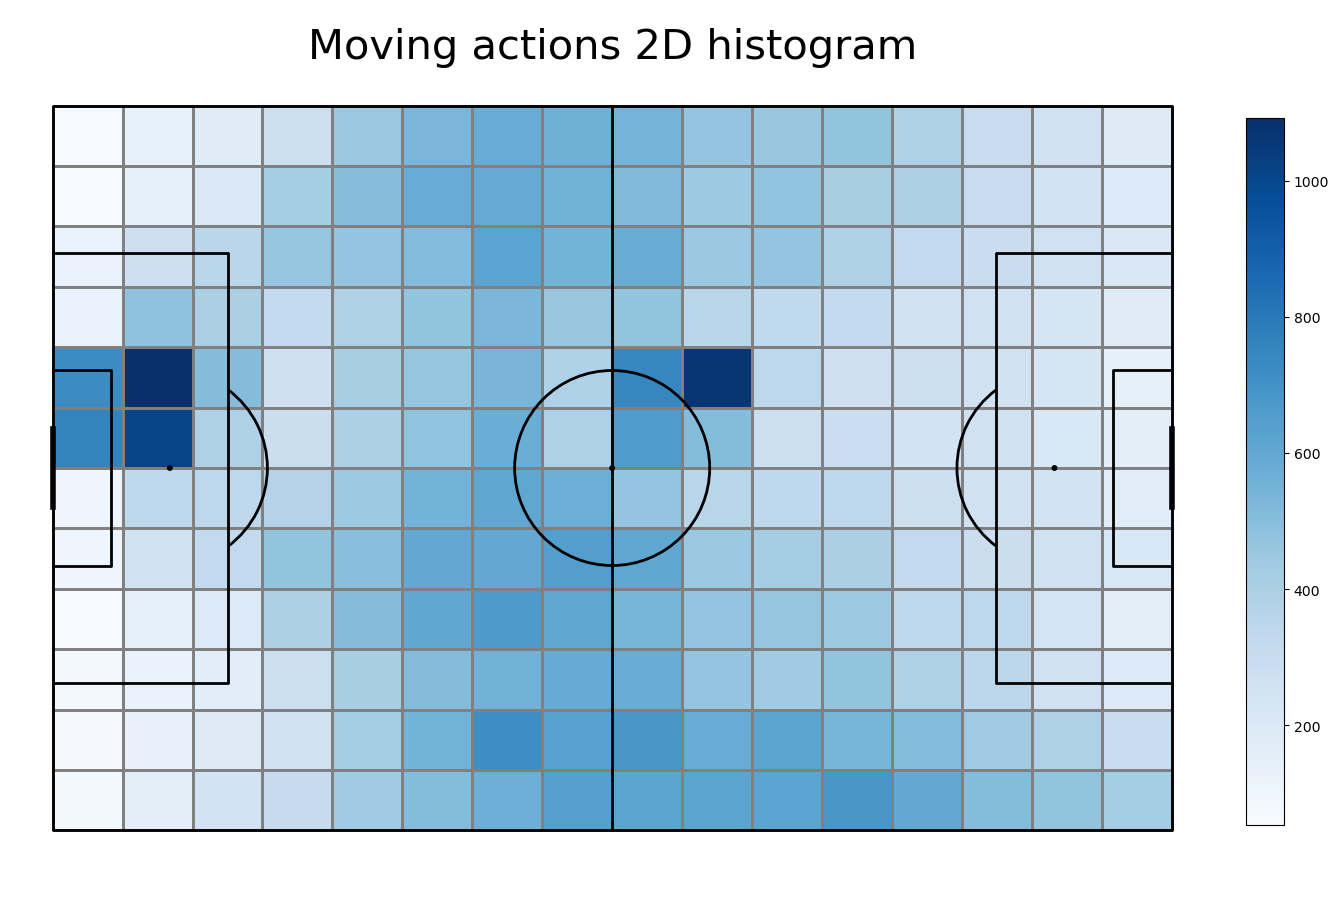

In [21]:
#create 2D histogram of these
pitch = Pitch(line_color='black',pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
move = pitch.bin_statistic(df_passes_shots.x, df_passes_shots.y, statistic='count', bins=(16, 12), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(move, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Moving actions 2D histogram', fontsize = 30)
plt.show()
#get the array
move_count = move["statistic"]

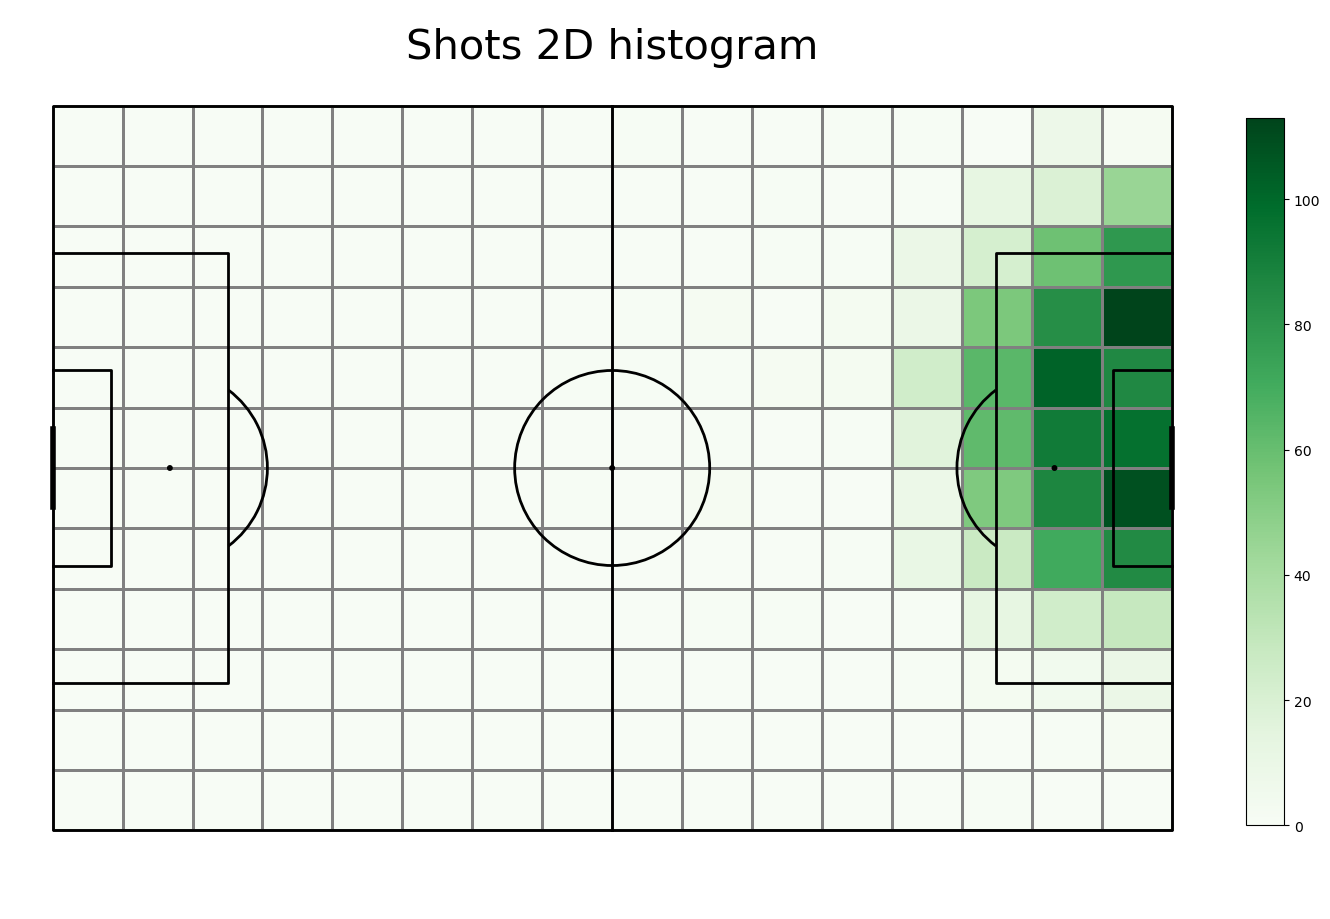

In [22]:
#get shot df

shot_df = df_passes_shots.loc[df_passes_shots['type_name'] == "Shot"]

#create 2D histogram of these
shot = pitch.bin_statistic(shot_df.x, shot_df.y, statistic='count', bins=(16, 12), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(shot, cmap='Greens', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shots 2D histogram', fontsize = 30)
plt.show()

shot_count = shot["statistic"]

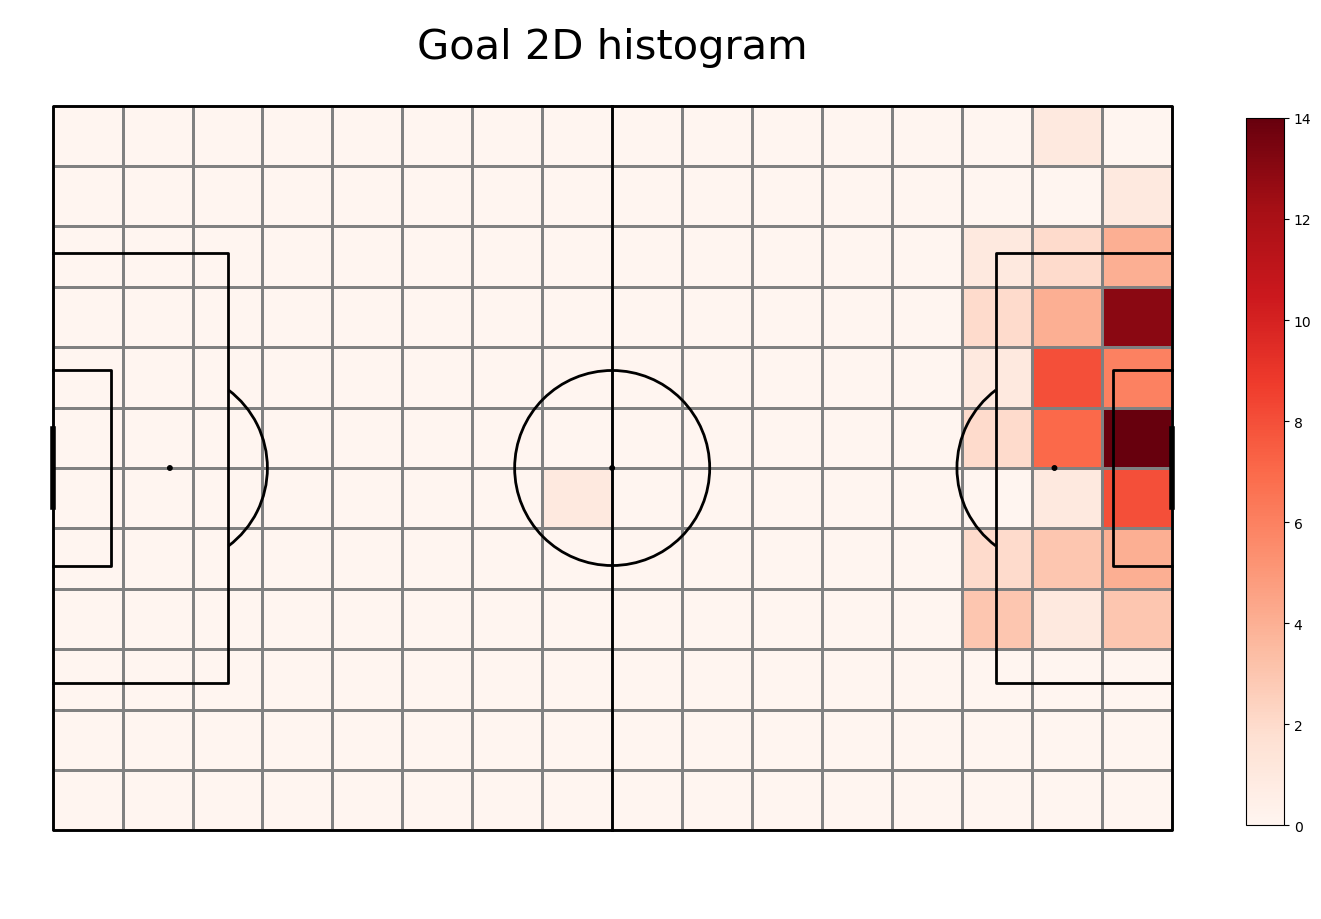

In [23]:
#get goal df
goal_df  = shot_df[shot_df['outcome_name'] == 'Goal']
goal = pitch.bin_statistic(goal_df.x, goal_df.y, statistic='count', bins=(16, 12), normalize=False)
goal_count = goal["statistic"]

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(goal, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal 2D histogram', fontsize = 30)
plt.show()

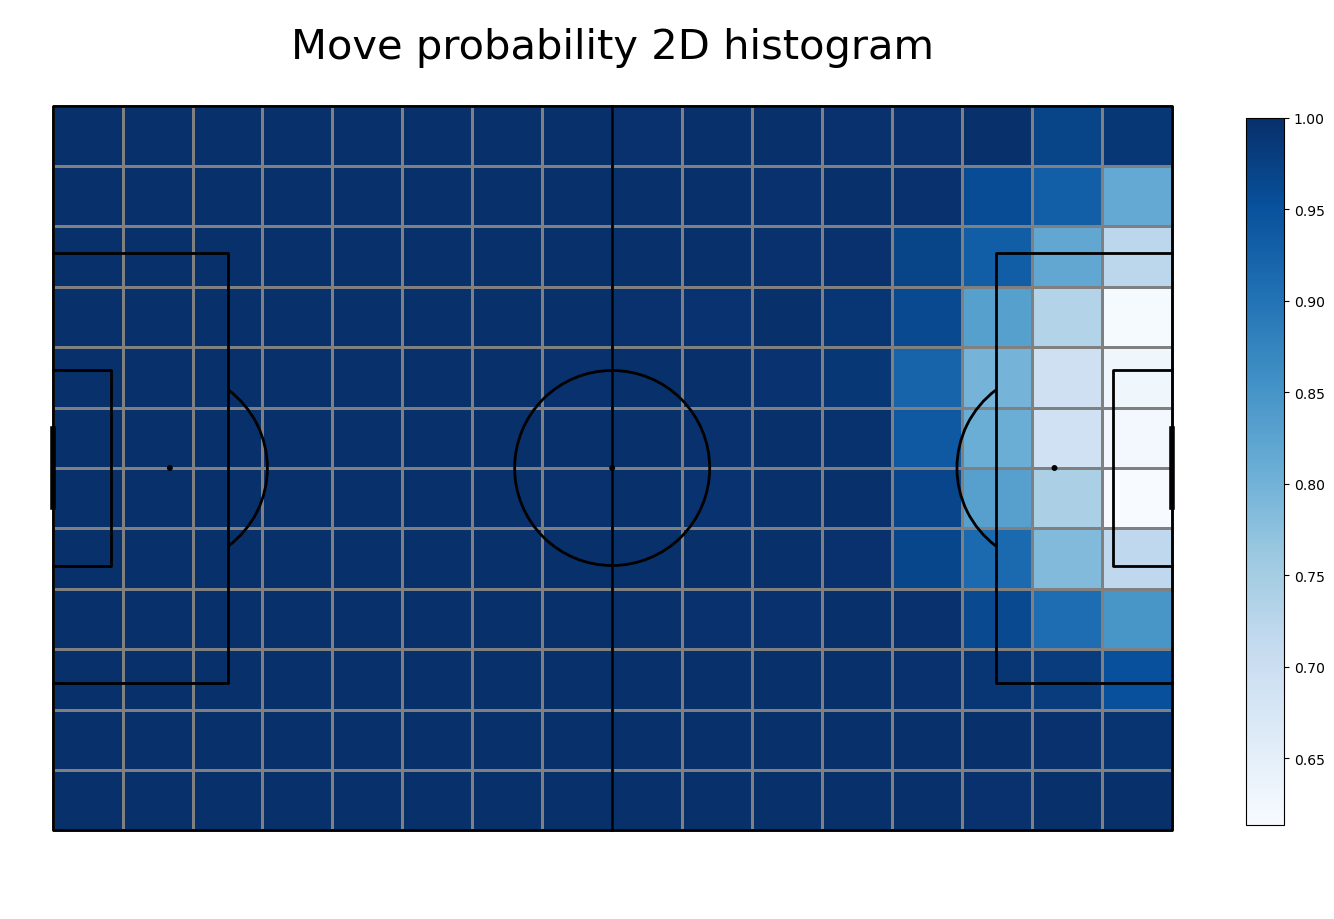

In [24]:
move_probability = move_count/(move_count+shot_count)
#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
move["statistic"] = move_probability
pcm  = pitch.heatmap(move, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Move probability 2D histogram', fontsize = 30)
plt.show()

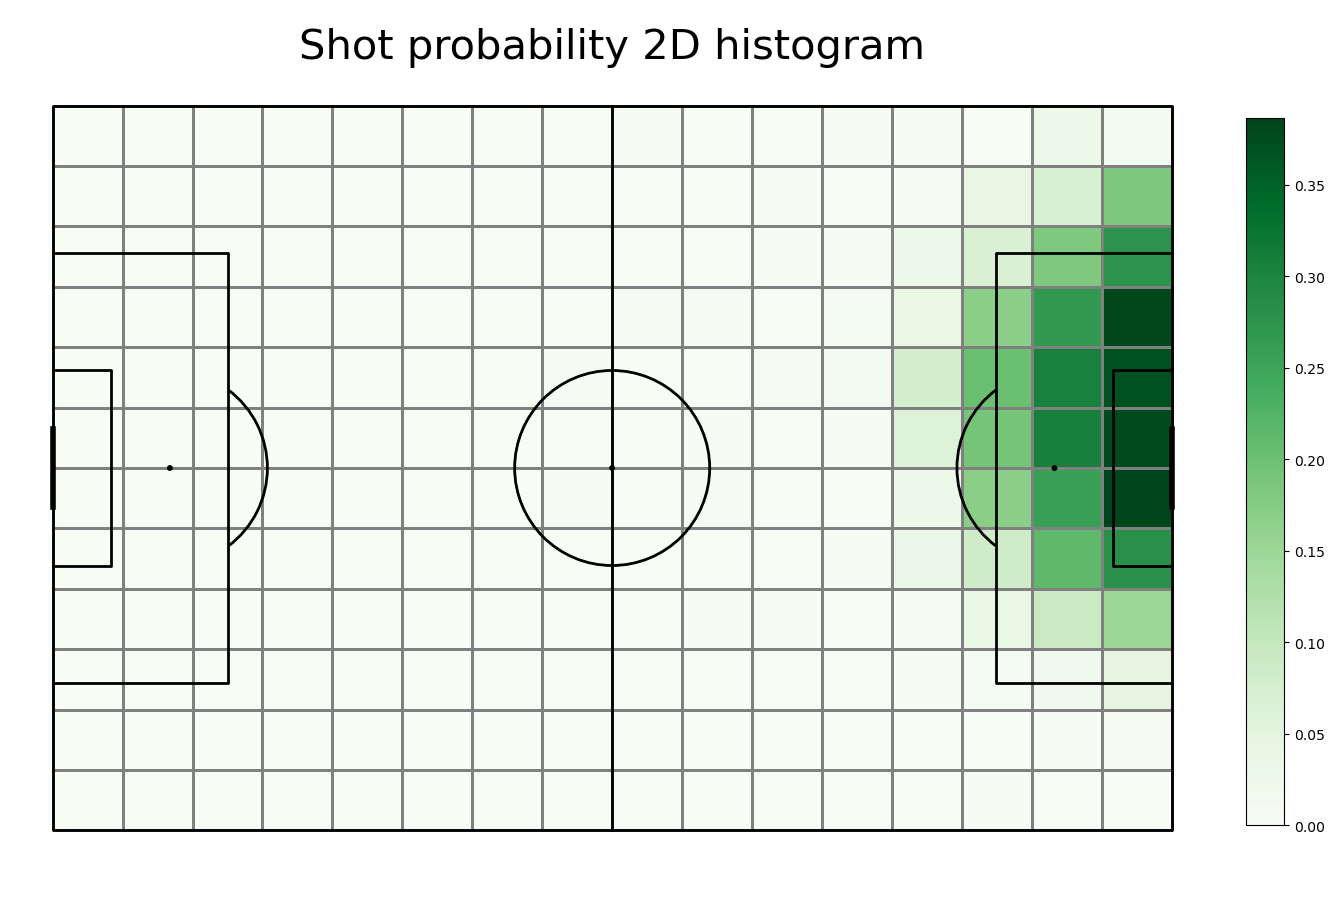

In [25]:
shot_probability = shot_count/(move_count+shot_count)
#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
shot["statistic"] = shot_probability
pcm  = pitch.heatmap(shot, cmap='Greens', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shot probability 2D histogram', fontsize = 30)
plt.show()

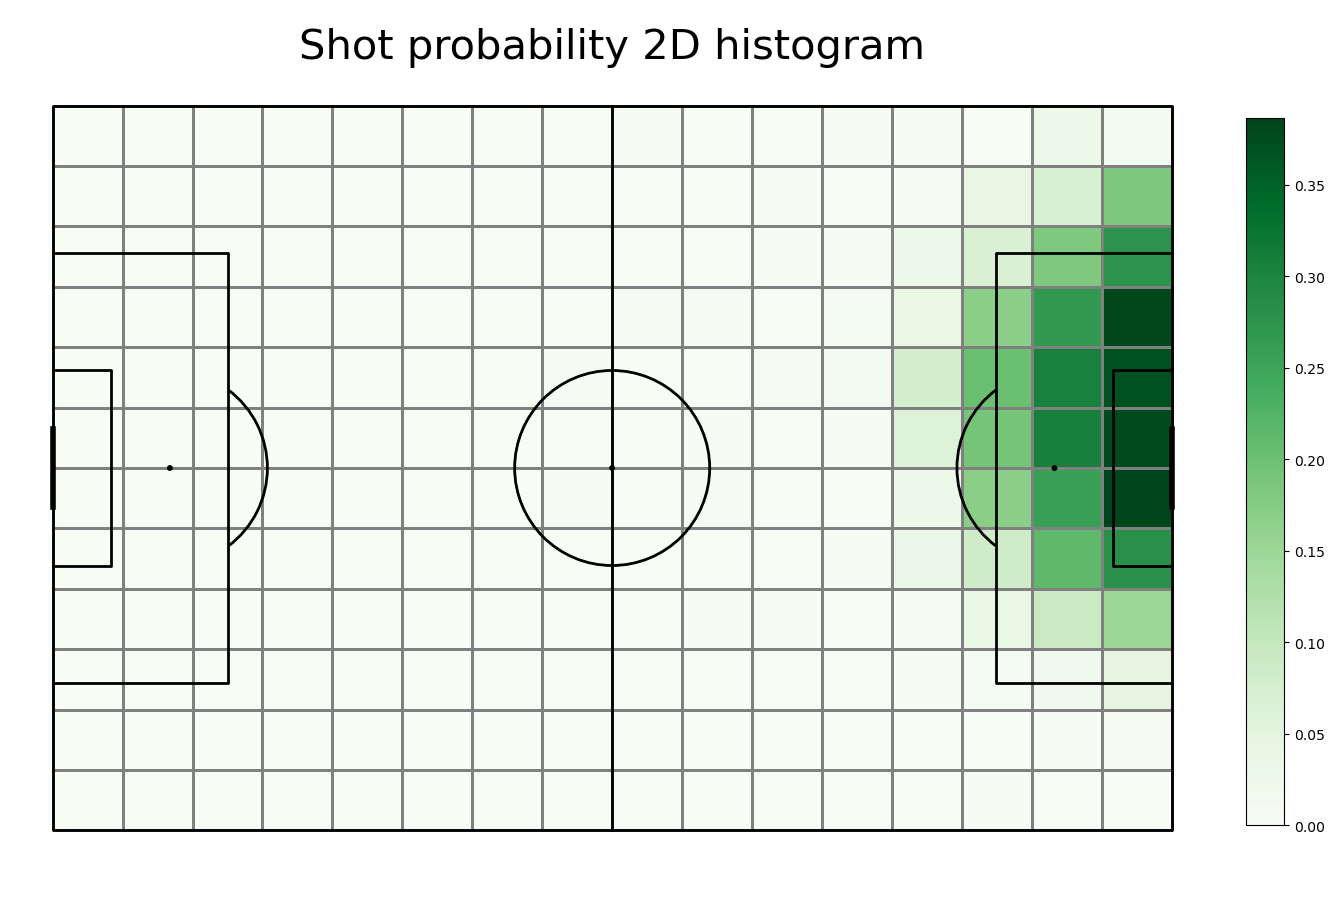

In [26]:
shot_probability = shot_count/(move_count+shot_count)
#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
shot["statistic"] = shot_probability
pcm  = pitch.heatmap(shot, cmap='Greens', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shot probability 2D histogram', fontsize = 30)
plt.show()

## Calculating xG value

### We will be using the statsbombs_xG 

In [71]:

df_passes_shots[df_passes_shots['type_name'] == 'Shot'][['shot_statsbomb_xg','possession']]


shot_statsbomb_xg  possession
368              0.006878          26
495              0.197586          31
731              0.035779          44
1069             0.006839          68
1356             0.031176          82
...                   ...         ...
344237           0.083276         149
344242           0.084007         150
344292           0.045613         160
344297           0.041662         160
344528           0.089938         175

[3095 rows x 2 columns]

In [72]:
# Assuming you have a DataFrame called 'df'
shot_rows = df_passes_shots[df_passes_shots['type_name'] == 'Shot']

In [73]:
shot_rows[['type_name','possession','team_name']]

type_name  possession        team_name
368         Shot          26        Hyderabad
495         Shot          31  Kerala Blasters
731         Shot          44  Kerala Blasters
1069        Shot          68  Kerala Blasters
1356        Shot          82  Kerala Blasters
...          ...         ...              ...
344237      Shot         149        Hyderabad
344242      Shot         150        Hyderabad
344292      Shot         160        Hyderabad
344297      Shot         160        Hyderabad
344528      Shot         175        Hyderabad

[3095 rows x 3 columns]

#### To add value to the passes that lead to the shot in the possession, we should add xG to the passes with value same as shot's xG. 

In [74]:
def prepareChains(df):
    df["shot_end"] = 0
    #get number of chains
    no_chains = max(df["possession"].unique())
    indicies = []
    for i in range(no_chains+1):
        #all events get possesion chain
        possesion_chain_df = df.loc[df["possession"] == i]
        #check if the possesion chain is not empty
        if len(possesion_chain_df) > 0:
            #if ended with shot
            if possesion_chain_df.iloc[-1]["type_name"] == "Shot":
                #assign values
                df.loc[df["possession"] == i, "shot_end"] = 1
                xG = possesion_chain_df.iloc[-1]["shot_statsbomb_xg"]
                df.loc[df["possession"] == i, "xG"] = xG
                #check if the previous ones did not end with foul
                k = i-1
                if k > 0:
                    try:
                        prev = df.loc[df["possession"] == k]
                        #create a loop if e.g. 2 chains before and 1 chain before didn;t end with shot
                        while prev.iloc[-1]["eventName"] == "Foul":
                            #assign value for them
                            df.loc[df["possession"] == k, "xG"] = xG
                            df.loc[df["possession"] == k, "shot_end"] = 1
                            k = k-1
                            prev = df.loc[df["possession"] == k]
                    except:
                        k = k-1
            #get indiices of events made by possesion team
            team_indicies = possesion_chain_df.loc[possesion_chain_df["team_name"] == possesion_chain_df.team_name.mode().iloc[0]].index.values.tolist()
            indicies.extend(team_indicies)

    df = df.loc[indicies]
    return df

df2 = prepareChains(df_passes_shots)

In [75]:
df2['match_id'].unique()

array([3827336, 3827338, 3817856, 3817889, 3817855, 3817873, 3817884,
       3817864, 3817888, 3813313, 3817854, 3817892, 3813303, 3813306,
       3817848, 3813281, 3813314, 3813312, 3813268, 3813264, 3817870,
       3817863, 3817894, 3817875, 3817890, 3817898, 3813271, 3817874,
       3817853, 3813270, 3813285, 3813316, 3813315, 3813308, 3813272,
       3813267, 3827767, 3817887, 3817897, 3817878, 3813305, 3813304,
       3817860, 3813309, 3813290, 3813288, 3813277, 3813287, 3813291,
       3817901, 3817862, 3817852, 3813282, 3817849, 3813284, 3813273,
       3813265, 3817869, 3817871, 3817857, 3813295, 3817879, 3813299,
       3817895, 3813266, 3817866, 3817886, 3817861, 3817858, 3813278,
       3813296, 3817851, 3817891, 3817877, 3817883, 3817868, 3813283,
       3813289, 3817867, 3817893, 3817859, 3817876, 3813301, 3813294,
       3813276, 3813318, 3813274, 3813286, 3817865, 3817900, 3817880,
       3813311, 3813280, 3813302, 3813297, 3813307, 3813293, 3813292,
       3817882, 3813

In [46]:
df_passes_shots

id  index  period        timestamp  \
5       75bd307e-271e-4d65-97a1-3f5d43361eb8      5       1  00:00:01.886000   
8       eea2643a-54d3-475b-917d-8441303854a7      8       1  00:00:05.201000   
9       2d464a33-a587-4e45-bfc5-35de0eae4d40      9       1  00:00:06.628000   
11      76287ee7-7212-42e7-93af-5924122fbe66     11       1  00:00:08.761000   
14      e988c84d-91b4-4db2-b845-65f640a93c7c     14       1  00:00:09.609000   
...                                      ...    ...     ...              ...   
344653  fb6a6ab2-25d1-40ed-bf8a-711181f107a0   3059       2  00:49:33.484000   
344655  9bbbf776-671e-4bd9-a6bb-e8b38c682fe6   3061       2  00:49:35.106000   
344662  73298cd6-9627-47e6-8d09-1ac63ac9e5ee   3068       2  00:50:04.509000   
344664  83c5be5a-8ab7-4c9b-958f-5d9d8d417ff1   3070       2  00:50:44.366000   
344666  de20bd07-46f2-4b5c-9050-3bb409687702   3072       2  00:50:46.641000   

        minute  second  possession  duration  match_id  type_id  ...  \
5            0       1           2  1.643562   3827767       30  ...   
8            0       5           2  1.427084   3827767       30  ...   
9            0       6           3  2.033153   3827767       30  ...   
11           0       8           3  0.812119   3827767       30  ...   
14           0       9           3  1.109306   3827767       30  ...   
...        ...     ...         ...       ...       ...      ...  ...   
344653      94      33         183  1.622216   3813264       30  ...   
344655      94      35         183  1.118121   3813264       30  ...   
344662      95       4         184  2.134957   3813264       30  ...   
344664      95      44         185  2.235390   3813264       30  ...   
344666      95      46         185  1.439292   3813264       30  ...   

       ball_recovery_offensive  pass_miscommunication player_off_permanent  \
5                          NaN                    NaN                  NaN   
8                          NaN                    NaN                  NaN   
9                          NaN                    NaN                  NaN   
11                         NaN                    NaN                  NaN   
14                         NaN                    NaN                  NaN   
...                        ...                    ...                  ...   
344653                     NaN                    NaN                  NaN   
344655                     NaN                    NaN                  NaN   
344662                     NaN                    NaN                  NaN   
344664                     NaN                    NaN                  NaN   
344666                     NaN                    NaN                  NaN   

        dribble_no_touch foul_committed_penalty  foul_won_penalty  \
5                    NaN                    NaN               NaN   
8                    NaN                    NaN               NaN   
9                    NaN                    NaN               NaN   
11                   NaN                    NaN               NaN   
14                   NaN                    NaN               NaN   
...                  ...                    ...               ...   
344653               NaN                    NaN               NaN   
344655               NaN                    NaN               NaN   
344662               NaN                    NaN               NaN   
344664               NaN                    NaN               NaN   
344666               NaN                    NaN               NaN   

       shot_follows_dribble  shot_redirect  shot_end        xG  
5                       NaN            NaN         1  0.033213  
8                       NaN            NaN         1  0.033213  
9                       NaN            NaN         0       NaN  
11                      NaN            NaN         0       NaN  
14                      NaN            NaN         0       NaN  
...                     ...            ...       ...       .

In [47]:
df2

id  index  period        timestamp  \
6707  3d00cfdd-0290-4583-b870-480a758d559d      5       1  00:00:00.064000   
6710  3f975827-bb21-4d0c-8a83-5b32fc781562      7       1  00:00:02.949000   
6713  35addd54-0998-4e63-bdcb-95b7a8348406     10       1  00:00:04.845000   
6716  e1e04be6-7d57-4d4c-b9cc-58610c8cd016     13       1  00:00:06.814000   
6719  44c23489-23e1-49b4-bbed-a9a6b713d54b     16       1  00:00:10.971000   
...                                    ...    ...     ...              ...   
4084  f651f3b7-38b6-41a6-80dd-e78f32303823   4085       5  00:04:58.550000   
4086  5569b138-aadd-4bf5-82ea-004508fc5ad3   4087       5  00:05:57.110000   
4088  567615bf-0186-4503-979f-d5c8817fafce   4089       5  00:06:55.461000   
4090  c8a9db35-f57d-4d51-8bc7-5a0bbadddcf5   4091       5  00:08:00.721000   
4092  ca85fa2e-f0d2-4fc1-8d33-cc96099a62f0   4093       5  00:08:58.988000   

      minute  second  possession  duration  match_id  type_id  ...  \
6707       0       0           2  1.551642   3827336       30  ...   
6710       0       2           2  1.556183   3827336       30  ...   
6713       0       4           2  0.870121   3827336       30  ...   
6716       0       6           2  1.745887   3827336       30  ...   
6719       0      10           2  1.512836   3827336       30  ...   
...      ...     ...         ...       ...       ...      ...  ...   
4084     124      58         258  0.534306   3827767       16  ...   
4086     125      57         259  0.559508   3827767       16  ...   
4088     126      55         260  0.612020   3827767       16  ...   
4090     128       0         261  0.397752   3827767       16  ...   
4092     128      58         262  0.550509   3827767       16  ...   

     ball_recovery_offensive  pass_miscommunication player_off_permanent  \
6707                     NaN                    NaN                  NaN   
6710                     NaN                    NaN                  NaN   
6713                     NaN                    NaN                  NaN   
6716                     NaN                    NaN                  NaN   
6719                     NaN                    NaN                  NaN   
...                      ...                    ...                  ...   
4084                     NaN                    NaN                  NaN   
4086                     NaN                    NaN                  NaN   
4088                     NaN                    NaN                  NaN   
4090                     NaN                    NaN                  NaN   
4092                     NaN                    NaN                  NaN   

      dribble_no_touch foul_committed_penalty  foul_won_penalty  \
6707               NaN                    NaN               NaN   
6710               NaN                    NaN               NaN   
6713               NaN                    NaN               NaN   
6716               NaN                    NaN               NaN   
6719               NaN                    NaN               NaN   
...                ...                    ...               ...   
4084               NaN                    NaN               NaN   
4086               NaN                    NaN               NaN   
4088               NaN                    NaN               NaN   
4090               NaN                    NaN               NaN   
4092               NaN                    NaN               NaN   

     shot_follows_dribble  shot_redirect  shot_end        xG  
6707                  NaN            NaN         1  0.033213  
6710                  NaN            NaN         1  0.033213  
6713                  NaN            NaN         1  0.033213  
6716                  NaN            NaN         1  0.033213  
6719                  NaN            NaN         1  0.033213  
...                   ...            ...       ...       ...  
4084                  NaN            NaN         1  0.783500  
4086                  NaN            NaN

In [76]:
df2[['xG','type_name','possession','team_name','match_id']]

xG type_name  possession        team_name  match_id
6707  0.033213      Pass           2  ATK Mohun Bagan   3827336
6710  0.033213      Pass           2  ATK Mohun Bagan   3827336
6712  0.033213     Carry           2  ATK Mohun Bagan   3827336
6713  0.033213      Pass           2  ATK Mohun Bagan   3827336
6715  0.033213     Carry           2  ATK Mohun Bagan   3827336
...        ...       ...         ...              ...       ...
4084  0.783500      Shot         258        Hyderabad   3827767
4086  0.783500      Shot         259  Kerala Blasters   3827767
4088  0.783500      Shot         260        Hyderabad   3827767
4090  0.783500      Shot         261  Kerala Blasters   3827767
4092  0.783500      Shot         262        Hyderabad   3827767

[26994 rows x 5 columns]

## Preparing data for modelling
As the next step we prepare data for modelling. We filter out dodgy events without end coordinates and store coordinates in different columns. We also create variable c as the distance of line parallel to x-axis throught the middle of the pitch. Moreover, we set end of a shot as (105, 34) contrary to Wyscout, which tends to store their ends as one of the corners.

In [77]:
df = df2.copy()

#columns with coordinates
df["x0"] = df2['x']
df["c0"] = abs(40 - df2['y']) 
df["x1"] = df2['end_x']
df["c1"] = abs(40 - df2['end_y']) 


#for plotting
df["y0"] = df2['y']
df["y1"] = df2['end_y']

In [78]:
df[df['outcome_name'] == 'Goal'][['x','x0','x1','y','y0','y1','end_x','end_y','c0','c1','outcome_name','possession','match_id']]

x     x0     x1     y    y0    y1  end_x  end_y    c0   c1  \
341615   94.1   94.1  120.0  48.1  48.1  43.4  120.0   43.4   8.1  3.4   
101998  117.1  117.1  120.0  42.1  42.1  40.0  120.0   40.0   2.1  0.0   
248195  108.0  108.0  120.0  40.1  40.1  43.0  120.0   43.0   0.1  3.0   
256325  113.3  113.3  120.0  41.1  41.1  41.2  120.0   41.2   1.1  1.2   
74628   115.3  115.3  120.0  37.5  37.5  36.3  120.0   36.3   2.5  3.7   
265552  117.0  117.0  120.0  41.2  41.2  40.0  120.0   40.0   1.2  0.0   
47535   111.8  111.8  120.0  34.1  34.1  36.8  120.0   36.8   5.9  3.2   
117551  107.9  107.9  120.0  40.0  40.0  37.0  120.0   37.0   0.0  3.0   
231930  109.5  109.5  120.0  48.2  48.2  36.5  120.0   36.5   8.2  3.5   
198821  107.4  107.4  120.0  46.0  46.0  43.0  120.0   43.0   6.0  3.0   
234937  108.1  108.1  120.0  34.7  34.7  43.7  120.0   43.7   5.3  3.7   
123994  112.7  112.7  120.0  31.9  31.9  43.3  120.0   43.3   8.1  3.3   
217009  109.7  109.7  120.0  26.7  26.7  43.8  120.0   43.8  13.3  3.8   
274701  117.1  117.1  120.0  39.8  39.8  38.6  120.0   38.6   0.2  1.4   
328013  108.9  108.9  120.0  38.8  38.8  42.4  120.0   42.4   1.2  2.4   
75515   113.6  113.6  120.0  31.6  31.6  39.0  120.0   39.0   8.4  1.0   
48048    96.0   96.0  120.0  43.2  43.2  43.5  120.0   43.5   3.2  3.5   
66716   108.8  108.8  120.0  35.1  35.1  37.7  120.0   37.7   4.9  2.3   
181609  114.5  114.5  120.0  32.1  32.1  43.1  120.0   43.1   7.9  3.1   
63521   114.2  114.2  120.0  23.7  23.7  37.2  120.0   37.2  16.3  2.8   
266468  105.7  105.7  120.0  33.2  33.2  43.6  120.0   43.6   6.8  3.6   
229560  113.6  113.6  120.0  48.0  48.0  41.9  120.0   41.9   8.0  1.9   
263008  103.2  103.2  120.0  26.1  26.1  43.6  120.0   43.6  13.9  3.6   
275178  118.0  118.0  120.0  44.4  44.4  41.2  120.0   41.2   4.4  1.2   
67055   109.3  109.3  120.0  34.3  34.3  39.7  120.0   39.7   5.7  0.3   
64338   113.6  113.6  120.0  29.0  29.0  43.3  120.0   43.3  11.0  3.3   
335083  119.5  119.5  120.0  41.9  41.9  42.1  120.0   42.1   1.9  2.1   
194578  113.5  113.5  120.0  40.4  40.4  38.8  120.0   38.8   0.4  1.2   
317254  117.1  117.1  120.0  29.9  29.9  39.2  120.0   39.2  10.1  0.8   
233596  113.6  113.6  120.0  37.7  37.7  43.4  120.0   43.4   2.3  3.4   
83361   101.4  101.4  120.0  37.4  37.4  43.7  120.0   43.7   2.6  3.7   
152390  113.1  113.1  120.0  38.1  38.1  37.3  120.0   37.3   1.9  2.7   
104584  109.8  109.8  120.0  32.5  32.5  38.6  120.0   38.6   7.5  1.4   
24744   109.1  109.1  120.0  32.7  32.7  41.7  120.0   41.7   7.3  1.7   
24797   107.4  107.4  120.0  55.9  55.9  37.9  120.0   37.9  15.9  2.1   
4080    108.1  108.1  120.0  40.1  40.1  37.4  120.0   37.4   0.1  2.6   
4086    108.1  108.1  120.0  40.1  40.1  43.4  120.0   43.4   0.1  3.4   
4088    108.1  108.1  120.0  40.1  40.1  42.9  120.0   42.9   0.1  2.9   
4092    108.1  108.1  120.0  40.1  40.1  38.8  120.0   38.8   0.1  1.2   

       outcome_name  possession  match_id  
341615         Goal           2   3813264  
101998         Goal           7   3817871  
248195         Goal          17   3813274  
256325         Goal          27   3813316  
74628          Goal          44   3817895  
265552         Goal          46   3813312  
47535          Goal          52   3817863  
117551         Goal          55   3817867  
231930         Goal          56   3813318  
198821         Goal          58   3813282  
234937         Goal          68   3813287  
123994         Goal          76   3817890  
217009         Goal          77   3817853  
274701         Goal          77   3813308  
328013         Goal          78   3813273  
75515          Goal          81   3817895  
48048          Goal          85   3817863  
66716          Goal          92   3817873  
181609         Goal          92   3813306  
63521          Goal          96   3817862  
266468         Goal          98   3813312  
229560         Goal         102   3817848  
263008         Goal         102   38133

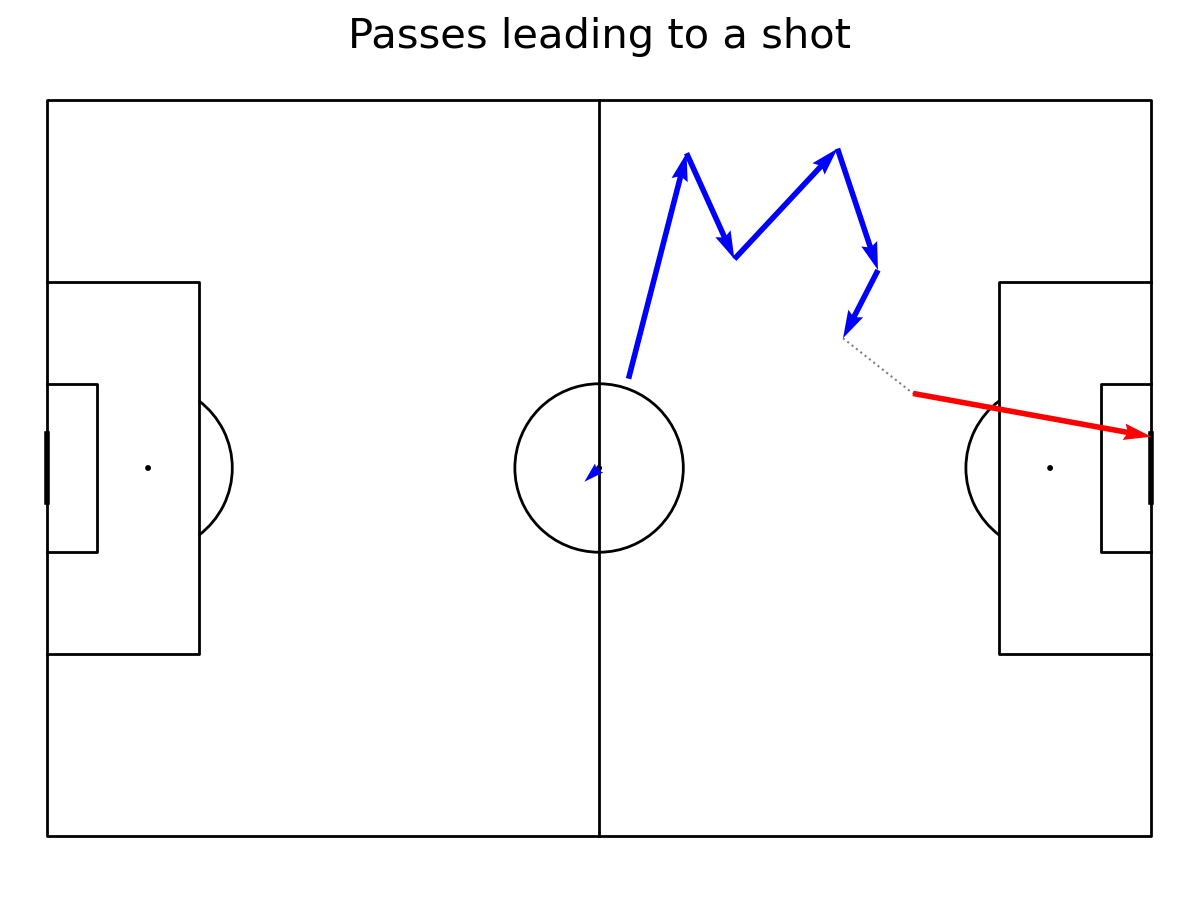

In [79]:
#plot possesion chain that ended with shot
chain = df.loc[df["possession"] == 2]
chain = chain.loc[chain["match_id"] == 3813264]
#get passes
passes = chain.loc[chain["type_name"].isin(["Pass"])]
#get events different than pass
not_pass = chain.loc[chain["type_name"] != "Pass"].iloc[:-1]
#shot is the last event of the chain (or should be)
shot = chain.iloc[-1]
#plot
pitch = Pitch(line_color='black',pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#passes
pitch.arrows(passes.x0, passes.y0,
            passes.x1, passes.y1, color = "blue", ax=ax['pitch'], zorder =  3)
#shot
pitch.arrows(shot.x0, shot.y0,
            shot.x1, shot.y1, color = "red", ax=ax['pitch'], zorder =  3)
#other passes like arrows
pitch.lines(not_pass.x0, not_pass.y0, not_pass.x1, not_pass.y1, color = "grey", lw = 1.5, ls = 'dotted', ax=ax['pitch'])
ax['title'].text(0.5, 0.5, 'Passes leading to a shot', ha='center', va='center', fontsize=30)
plt.show()

## We can see that there is a gap in between the passes, it could be because there could be some pressure applied in between by the team not in possession. Or it could be something else

#### To verify this, we should include all the events in between the possession

In [81]:
def prepareChains(df):
    df["shot_end"] = 0
    #get number of chains
    no_chains = max(df["possession"].unique())
    indicies = []
    for i in range(no_chains+1):
        #all events get possesion chain
        possesion_chain_df = df.loc[df["possession"] == i]
        #check if the possesion chain is not empty
        if len(possesion_chain_df) > 0:
            #if ended with shot
            if possesion_chain_df.iloc[-1]["type_name"] == "Shot":
                #assign values
                df.loc[df["possession"] == i, "shot_end"] = 1
                xG = possesion_chain_df.iloc[-1]["shot_statsbomb_xg"]
                df.loc[df["possession"] == i, "xG"] = xG
                #check if the previous ones did not end with foul
                k = i-1
                if k > 0:
                    try:
                        prev = df.loc[df["possession"] == k]
                        #create a loop if e.g. 2 chains before and 1 chain before didn;t end with shot
                        while prev.iloc[-1]["eventName"] == "Foul":
                            #assign value for them
                            df.loc[df["possession"] == k, "xG"] = xG
                            df.loc[df["possession"] == k, "shot_end"] = 1
                            k = k-1
                            prev = df.loc[df["possession"] == k]
                    except:
                        k = k-1
            #get indiices of events made by possesion team
            team_indicies = possesion_chain_df.loc[possesion_chain_df["team_name"] == possesion_chain_df.team_name.mode().iloc[0]].index.values.tolist()
            indicies.extend(team_indicies)

    df = df.loc[indicies]
    return df

df2_full = prepareChains(df_events)

In [84]:
df = df2_full.copy()

#columns with coordinates
df["x0"] = df2_full['x']
df["c0"] = abs(40 - df2['y']) 
df["x1"] = df2_full['end_x']
df["c1"] = abs(40 - df2['end_y']) 


#for plotting
df["y0"] = df2_full['y']
df["y1"] = df2_full['end_y']

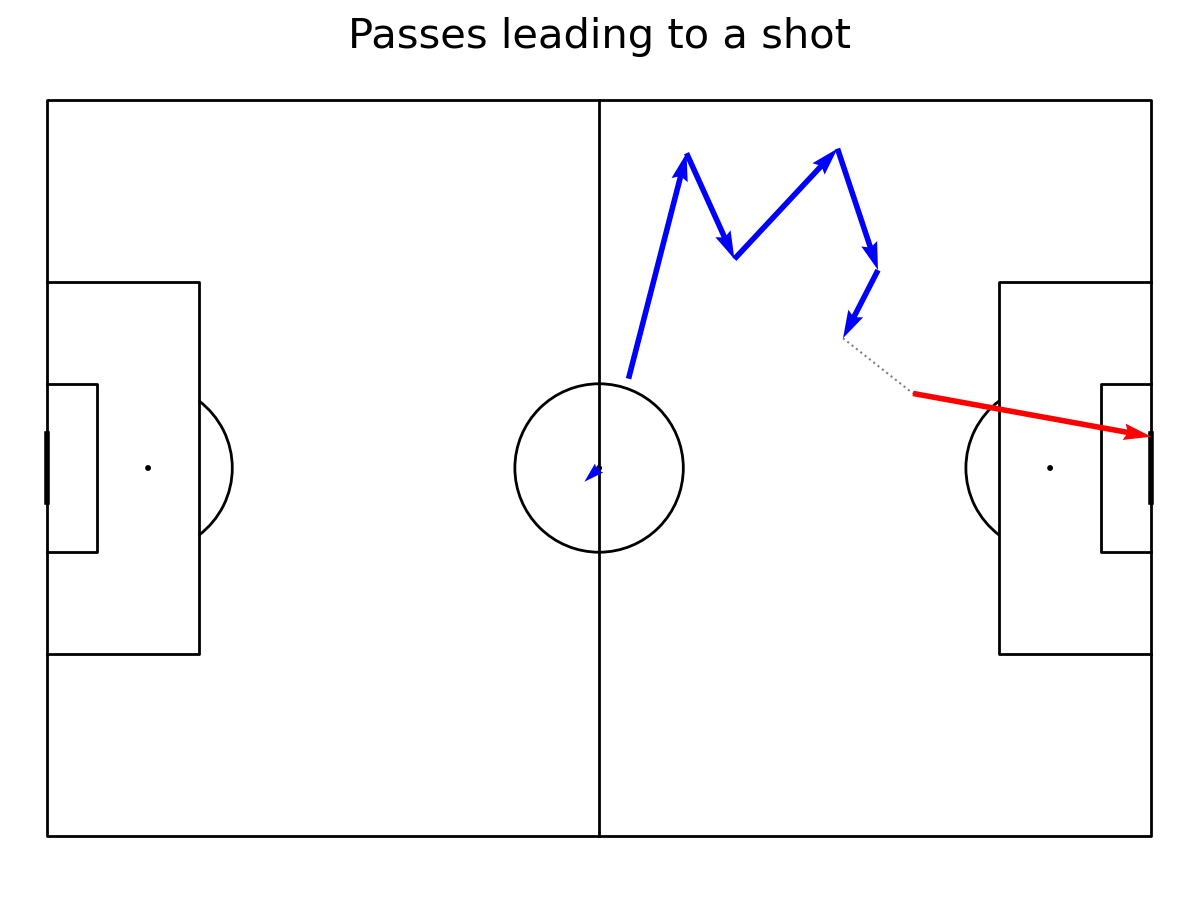

In [85]:
#plot possesion chain that ended with shot
chain = df.loc[df["possession"] == 2]
chain = chain.loc[chain["match_id"] == 3813264]
#get passes
passes = chain.loc[chain["type_name"].isin(["Pass"])]
#get events different than pass
not_pass = chain.loc[chain["type_name"] != "Pass"].iloc[:-1]
#shot is the last event of the chain (or should be)
shot = chain.iloc[-1]
#plot
pitch = Pitch(line_color='black',pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#passes
pitch.arrows(passes.x0, passes.y0,
            passes.x1, passes.y1, color = "blue", ax=ax['pitch'], zorder =  3)
#shot
pitch.arrows(shot.x0, shot.y0,
            shot.x1, shot.y1, color = "red", ax=ax['pitch'], zorder =  3)
#other passes like arrows
pitch.lines(not_pass.x0, not_pass.y0, not_pass.x1, not_pass.y1, color = "grey", lw = 1.5, ls = 'dotted', ax=ax['pitch'])
ax['title'].text(0.5, 0.5, 'Passes leading to a shot', ha='center', va='center', fontsize=30)
plt.show()

In [87]:
not_pass[['type_name','x0','y0','x1','y1']]

type_name    x0    y0    x1    y1
341601  Ball Receipt  58.4  38.5   NaN   NaN
341603  Ball Receipt  69.5  74.2   NaN   NaN
341604         Carry  69.5  74.2  69.5  74.2
341606  Ball Receipt  74.7  62.7   NaN   NaN
341608  Ball Receipt  85.9  74.7   NaN   NaN
341610  Ball Receipt  90.3  61.5   NaN   NaN
341611         Carry  90.3  61.5  90.3  61.5
341613  Ball Receipt  86.5  54.1   NaN   NaN
341614         Carry  86.5  54.1  94.1  48.1

In [142]:
passes[['type_name','x0','y0','x1','y1','c0','c1']]

type_name     x0    y0     x1    y1    c0    c1
6707      Pass   61.0  40.1   56.3  41.9   0.1   1.9
6710      Pass   58.2  45.5   55.2  58.8   5.5  18.8
6713      Pass   56.1  59.0   47.3  56.0  19.0  16.0
6716      Pass   44.5  54.3   28.1  28.6  14.3  11.4
6719      Pass   31.1  29.0   29.1  53.4  11.0  13.4
...        ...    ...   ...    ...   ...   ...   ...
4053      Pass   32.7  20.6   43.5  13.0  19.4  27.0
4057      Pass   42.9   8.8   31.6  16.3  31.2  23.7
4060      Pass   32.4  20.9   70.7  22.4  19.1  17.6
4066      Pass   88.1  50.1  102.8  67.6  10.1  27.6
4069      Pass  105.5  65.1  110.1  58.1  25.1  18.1

[14658 rows x 7 columns]

In [143]:
# Assuming you have a DataFrame called 'df'
nan_rows2 = passes[passes['c0'].isna() & passes['c1'].isna()]

In [147]:
nan_rows2[['x0','y0','x1','y1','c0','c1']]

x0    y0     x1    y1    c0    c1
7053     67.6  13.9  101.4  12.1  26.1  27.9
7060    112.3  22.8  111.3  40.2  17.2   0.2
7064     83.0  15.1   87.3  18.3  24.9  21.7
7072    112.8   9.4  117.0  33.3  30.6   6.7
7077     39.6  18.8   19.3  26.0  21.2  14.0
...       ...   ...    ...   ...   ...   ...
215638   51.3  24.1  116.8   5.2  15.9  34.8
215643   51.8  25.3   37.8  42.1  14.7   2.1
215646   38.1  43.5   81.1  23.9   3.5  16.1
4015      5.6  40.5   30.9  33.3   0.5   6.7
4019     26.4  35.9   40.6  35.9   4.1   4.1

[1357 rows x 6 columns]

In [146]:
nan_rows2["c0"] = abs(40 - nan_rows2['y0']) 
nan_rows2["c1"] = abs(40 - nan_rows2['y1']) 


In [89]:
chain

id  index  period        timestamp  \
341599  7e836589-d899-495a-82b3-94c7b8f03733      5       1  00:00:00.464000   
341601  b39ba756-f756-43d7-8c97-4b183afb9369      6       1  00:00:01.431000   
341602  179d16b9-fc73-4727-81eb-3d1c62808b5d      7       1  00:00:03.687000   
341603  5ea49264-61da-4fd8-aef0-948d94c0903a      8       1  00:00:05.854000   
341604  8e8a1415-d1ed-4379-bdfe-d248ab312172      9       1  00:00:05.854000   
341605  18b05408-a651-4bc9-8c3b-a6a22627b4e1     10       1  00:00:05.864000   
341606  677ab909-c965-4241-83c0-2dc4d14aa4e0     11       1  00:00:06.383000   
341607  771cfc50-948a-4b27-a158-f073def29bfd     12       1  00:00:06.383000   
341608  41e40abd-c34e-40b6-8a3c-35ea0aa67ba4     13       1  00:00:07.934000   
341609  086644bf-2cff-4c5e-a2c1-6a53c75270df     14       1  00:00:07.934000   
341610  f52a3f74-8390-417a-9e85-52989704f111     15       1  00:00:08.895000   
341611  95ee841e-e6ed-47e5-9c27-34ae7558de78     16       1  00:00:08.895000   
341612  17a79c61-5ec2-4517-a180-b116b76bb5ae     17       1  00:00:08.933000   
341613  74758299-7a4c-4498-83cc-b7de66b28c29     18       1  00:00:10.057000   
341614  3d694d0b-e656-4ee0-8846-8180ef5e1d00     19       1  00:00:10.057000   
341615  9e33f111-053a-4de4-be52-f82757de3395     20       1  00:00:11.171000   

        minute  second  possession  duration  match_id  type_id  ...  \
341599       0       0           2  0.967357   3813264       30  ...   
341601       0       1           2       NaN   3813264       42  ...   
341602       0       3           2  2.167059   3813264       30  ...   
341603       0       5           2       NaN   3813264       42  ...   
341604       0       5           2  0.009290   3813264       43  ...   
341605       0       5           2  0.518898   3813264       30  ...   
341606       0       6           2       NaN   3813264       42  ...   
341607       0       6           2  1.551047   3813264       30  ...   
341608       0       7           2       NaN   3813264       42  ...   
341609       0       7           2  0.961678   3813264       30  ...   
341610       0       8           2       NaN   3813264       42  ...   
341611       0       8           2  0.038077   3813264       43  ...   
341612       0       8           2  1.123933   3813264       30  ...   
341613       0      10           2       NaN   3813264       42  ...   
341614       0      10           2  1.113241   3813264       43  ...   
341615       0      11           2  1.246077   3813264       16  ...   

       shot_follows_dribble  shot_redirect shot_end  xG    x0    c0     x1  \
341599                  NaN            NaN        0 NaN  60.0   0.0   58.4   
341601                  NaN            NaN        0 NaN  58.4   NaN    NaN   
341602                  NaN            NaN        0 NaN  63.2   9.7   69.5   
341603                  NaN            NaN        0 NaN  69.5   NaN    NaN   
341604                  NaN            NaN        0 NaN  69.5  34.2   69.5   
341605                  NaN            NaN        0 NaN  69.5  34.2   74.7   
341606                  NaN            NaN        0 NaN  74.7   NaN    NaN   
341607                  NaN            NaN        0 NaN  74.7  22.7   85.9   
341608                  NaN            NaN        0 NaN  85.9   NaN    NaN   
341609                  NaN            NaN        0 NaN  85.9  34.7   90.3   
341610                  NaN            NaN        0 NaN  90.3   NaN    NaN   
341611                  NaN            NaN        0 NaN  90.3  21.5   90.3   
341612                  NaN            NaN        0 NaN  90.3  21.5   86.5   
341613                  NaN            NaN        0 NaN  86.5   NaN    NaN   
341614                  NaN            NaN        0 NaN  86.5  14.1   94.1   
341615                  NaN            NaN        0 NaN  94.1   8.1  120.0   

          c1    y0    y1  
341599   1.5  40.0  38.5  
341601   NaN  38.5   NaN  
341602  34.2  49.7  74.2  
341603   NaN  74.2   

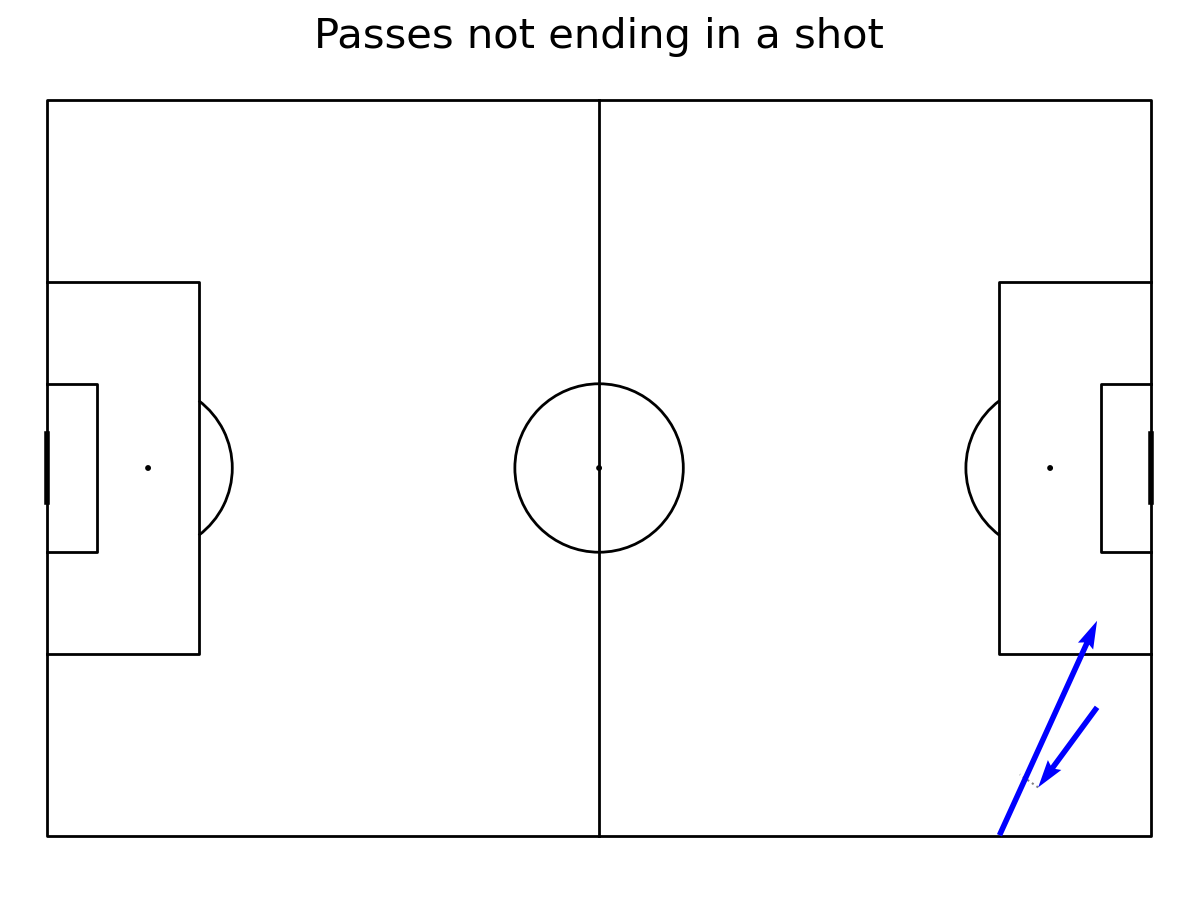

In [103]:
#plot possesion chain that ended with shot
chain = df.loc[df["possession"] == 3]
chain = chain.loc[chain["match_id"] == 3817870]
passes = chain.loc[chain["type_name"].isin(["Pass", "Free Kick"])].iloc[:-1]
not_pass = chain.loc[(chain["type_name"] != "Pass") & (chain["type_name"] != "Free Kick")].iloc[:-1]
bad_pass = chain.iloc[-1]
#we could have used better
pitch = Pitch(line_color='black',pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(passes.x0, passes.y0,
            passes.x1, passes.y1, color = "blue", ax=ax['pitch'], zorder =  3)
pitch.arrows(bad_pass.x0, bad_pass.y0,
            bad_pass.x1, bad_pass.y1, color = "purple", ax=ax['pitch'], zorder =  3)
pitch.scatter(bad_pass.x1, bad_pass.y1, marker = 'x', color = "red", ax=ax['pitch'], zorder =  3, s= 200)
pitch.lines(not_pass.x0, not_pass.y0, not_pass.x1, not_pass.y1, color = "grey", lw = 1.5, ls = 'dotted', ax=ax['pitch'])
ax['title'].text(0.5, 0.5, 'Passes not ending in a shot', ha='center', va='center', fontsize=30)
plt.show()

In [106]:
df.to_csv("possession_chain_ISL.csv", index=False)


## Preparing variables for models
For our models we will use all non-linear combinations of the starting and ending x coordinate and c - distance from the middle of the pitch. We create combinations with replacement of these variables - to get their non-linear transfomations. As the next step, we multiply the columns in the combination and create a model with them.

In [108]:
from itertools import combinations_with_replacement

#model variables
var = ["x0", "x1", "c0", "c1"]

#combinations
inputs = []
#one variable combinations
inputs.extend(combinations_with_replacement(var, 1))
#2 variable combinations
inputs.extend(combinations_with_replacement(var, 2))
#3 variable combinations
inputs.extend(combinations_with_replacement(var, 3))

#make new columns
for i in inputs:
    #columns length 1 already exist
    if len(i) > 1:
        #column name
        column = ''
        x = 1
        for c in i:
            #add column name to be x0x1c0 for example
            column += c
            #multiply values in column
            x = x*df[c]
        #create a new column in df
        df[column] = x
        #add column to model variables
        var.append(column)
#investigate 3 columns
df[var[-3:]].head(3)

c0c0c1  c0c1c1  c1c1c1
0        NaN     NaN     NaN
3        NaN     NaN     NaN
6704     NaN     NaN     NaN

In [110]:
df[['x0','c0','x1','c1','type_name']]

x0   c0     x1   c1    type_name
0       NaN  NaN    NaN  NaN  Starting XI
3       NaN  NaN    NaN  NaN   Half Start
6704    NaN  NaN    NaN  NaN  Starting XI
6705    NaN  NaN    NaN  NaN   Half Start
9485    NaN  NaN    NaN  NaN  Starting XI
...     ...  ...    ...  ...          ...
4087    1.0  NaN    NaN  NaN  Goal Keeper
4088  108.1  0.1  120.0  2.9         Shot
4091    1.0  NaN    NaN  NaN  Goal Keeper
4092  108.1  0.1  120.0  1.2         Shot
4094    NaN  NaN    NaN  NaN     Half End

[49501 rows x 5 columns]

In [113]:

from sklearn.model_selection import train_test_split
import xgboost

passes = df.loc[ df["type_name"].isin(["Pass"])]

X = passes[var].values 
y = passes["shot_end"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123, stratify = y)
model = xgboost.XGBClassifier(n_estimators = 100, ccp_alpha=0, max_depth=4, min_samples_leaf=10,
                       random_state=123)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print(np.mean(scores), np.std(scores))
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))


0.9954517885450409 0.00033905784038273674
[12:22:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ccp_alpha", "min_samples_leaf" } are not used.

0.9998483929654336
0.995225102319236


In [116]:
from sklearn.linear_model import LinearRegression

#predict if ended with shot
passes = df.loc[df["type_name"].isin(["Pass"])]
X = passes[var].values
y = passes["shot_end"].values
#predict probability of shot ended
y_pred_proba = model.predict_proba(X)[::,1]

passes["shot_prob"] = y_pred_proba
#OLS
shot_ended = passes.loc[passes["shot_end"] == 1]
X2 = shot_ended[var].values
y2 = shot_ended["xG"].values
lr = LinearRegression()
lr.fit(X2, y2)
y_pred = lr.predict(X)
passes["xG_pred"] = y_pred
#calculate xGchain
passes["xT"] = passes["xG_pred"]*passes["shot_prob"]

passes[["xG_pred", "shot_prob", "xT"]].head(5)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [117]:
df_cleaned = df

In [118]:
# Assuming you have a DataFrame called 'df'
df_cleaned = df_cleaned.dropna(subset=['x0', 'x1', 'y0', 'y1'])


In [119]:


from sklearn.model_selection import train_test_split
import xgboost

passes = df_cleaned.loc[ df_cleaned["type_name"].isin(["Pass"])]
X = passes[var].values 
y = passes["shot_end"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123, stratify = y)
model = xgboost.XGBClassifier(n_estimators = 100, ccp_alpha=0, max_depth=4, min_samples_leaf=10,
                       random_state=123)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print(np.mean(scores), np.std(scores))
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.9954517885450409 0.00033905784038273674
[12:26:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ccp_alpha", "min_samples_leaf" } are not used.

0.9998483929654336
0.995225102319236


In [120]:
from sklearn.linear_model import LinearRegression

#predict if ended with shot
passes = df_cleaned.loc[df_cleaned["type_name"].isin(["Pass"])]
X = passes[var].values
y = passes["shot_end"].values
#predict probability of shot ended
y_pred_proba = model.predict_proba(X)[::,1]

passes["shot_prob"] = y_pred_proba
#OLS
shot_ended = passes.loc[passes["shot_end"] == 1]
X2 = shot_ended[var].values
y2 = shot_ended["xG"].values
lr = LinearRegression()
lr.fit(X2, y2)
y_pred = lr.predict(X)
passes["xG_pred"] = y_pred
#calculate xGchain
passes["xT"] = passes["xG_pred"]*passes["shot_prob"]

passes[["xG_pred", "shot_prob", "xT"]].head(5)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [125]:
passes

id  index  period        timestamp  \
6707  3d00cfdd-0290-4583-b870-480a758d559d      5       1  00:00:00.064000   
6710  3f975827-bb21-4d0c-8a83-5b32fc781562      7       1  00:00:02.949000   
6713  35addd54-0998-4e63-bdcb-95b7a8348406     10       1  00:00:04.845000   
6716  e1e04be6-7d57-4d4c-b9cc-58610c8cd016     13       1  00:00:06.814000   
6719  44c23489-23e1-49b4-bbed-a9a6b713d54b     16       1  00:00:10.971000   
...                                    ...    ...     ...              ...   
4053  3681f1d4-47d0-49e9-b7fe-d83cdd1b6592   4054       4  00:14:28.601000   
4057  953a4870-e5ad-493b-b1ab-2695e400e1be   4058       4  00:14:30.051000   
4060  faf894b6-282b-4477-8957-85eac933ed47   4061       4  00:14:32.565000   
4066  1ec3a193-0eb6-430b-9769-a1a40891dccf   4067       4  00:14:39.150000   
4069  c2d303b3-e78b-4b58-9e7e-47d318652138   4070       4  00:14:41.805000   

      minute  second  possession  duration  match_id  type_id  ...  \
6707       0       0           2  1.551642   3827336       30  ...   
6710       0       2           2  1.556183   3827336       30  ...   
6713       0       4           2  0.870121   3827336       30  ...   
6716       0       6           2  1.745887   3827336       30  ...   
6719       0      10           2  1.512836   3827336       30  ...   
...      ...     ...         ...       ...       ...      ...  ...   
4053     119      28         253  0.994320   3827767       30  ...   
4057     119      30         253  1.247567   3827767       30  ...   
4060     119      32         253  2.119159   3827767       30  ...   
4066     119      39         253  2.057531   3827767       30  ...   
4069     119      41         253  0.180624   3827767       30  ...   

          x1x1c0      x1x1c1     x1c0c0     x1c0c1     x1c1c1     c0c0c0  \
6707     316.969    6022.411      0.563     10.697    203.243      0.001   
6710   16758.720   57284.352   1669.800   5707.680  19509.888    166.375   
6713   42508.510   35796.640  17075.300  14379.200  12108.800   6859.000   
6716   11291.423    9001.554   5746.169   4580.862   3651.876   2924.207   
6719    9314.910   11347.254   3521.100   4289.340   5225.196   1331.000   
...          ...         ...        ...        ...        ...        ...   
4053   36709.650   51090.750  16371.660  22785.300  31711.500   7301.384   
4057   31155.072   23665.872  30760.704  23366.304  17749.404  30371.328   
4060   95471.159   87973.424  25792.067  23766.512  21900.032   6967.871   
4066  106735.184  291672.384  10486.628  28656.528  78308.928   1030.301   
4069  304262.451  219408.381  69364.101  50019.531  36069.861  15813.251   

         c0c0c1     c0c1c1     c1c1c1 shot_prob  
6707      0.019      0.361      6.859  0.001818  
6710    568.700   1943.920   6644.672  0.000592  
6713   5776.000   4864.000   4096.000  0.000214  
6716   2331.186   1858.428   1481.544  0.000090  
6719   1621.400   1975.160   2406.104  0.000026  
...         ...        ...        ...       ...  
4053  10161.720  14142.600  19683.000  0.000537  
4057  23070.528  17524.728  13312.053  0.001938  
4060   6420.656   5916.416   5451.776  0.000503  
4066   2815.476   7693.776  21024.576  0.000206  
4069  11403.181   8223.011   5929.741  0.003481  

[14658 rows x 126 columns]

[12:22:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ccp_alpha", "min_samples_leaf" } are not used.

[12:26:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ccp_alpha", "min_samples_leaf" } are not used.

[12:22:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ccp_alpha", "min_samples_leaf" } are not used.

[12:26:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ccp_alpha", "min_samples_leaf" } are not used.

[12:22:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ccp_alpha", "min_samples_leaf" } are n

In [128]:
# Assuming you have a DataFrame called 'df'
columns_with_nan = shot_ended.columns[shot_ended.isna().any()].tolist()

In [129]:
columns_with_nan

['tactics_formation',
 'pass_recipient_id',
 'pass_recipient_name',
 'body_part_id',
 'body_part_name',
 'sub_type_id',
 'sub_type_name',
 'outcome_id',
 'outcome_name',
 'counterpress',
 'under_pressure',
 'dribble_overrun',
 'pass_cross',
 'pass_cut_back',
 'off_camera',
 'out',
 'aerial_won',
 'pass_switch',
 'ball_recovery_recovery_failure',
 'foul_committed_card_id',
 'foul_committed_card_name',
 'technique_id',
 'technique_name',
 'pass_assisted_shot_id',
 'pass_shot_assist',
 'shot_statsbomb_xg',
 'end_z',
 'shot_key_pass_id',
 'goalkeeper_position_id',
 'goalkeeper_position_name',
 'foul_won_defensive',
 'substitution_replacement_id',
 'substitution_replacement_name',
 'shot_first_time',
 'shot_one_on_one',
 'pass_deflected',
 'pass_goal_assist',
 'pass_no_touch',
 'block_offensive',
 'block_deflection',
 'injury_stoppage_in_chain',
 'block_save_block',
 'foul_committed_advantage',
 'foul_won_advantage',
 'dribble_nutmeg',
 'foul_committed_offensive',
 'bad_behaviour_card_id',


In [131]:
shot_ended = shot_ended.drop(columns=columns_with_nan)


In [132]:
#predict if ended with shot
passes = df_cleaned.loc[df_cleaned["type_name"].isin(["Pass"])]
X = passes[var].values
y = passes["shot_end"].values
#predict probability of shot ended
y_pred_proba = model.predict_proba(X)[::,1]

passes["shot_prob"] = y_pred_proba
#OLS

X2 = shot_ended[var].values
y2 = shot_ended["xG"].values
lr = LinearRegression()
lr.fit(X2, y2)
y_pred = lr.predict(X)
passes["xG_pred"] = y_pred
#calculate xGchain
passes["xT"] = passes["xG_pred"]*passes["shot_prob"]

passes[["xG_pred", "shot_prob", "xT"]].head(5)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [133]:
columns_with_nan = passes.columns[passes.isna().any()].tolist()

In [134]:
columns_with_nan

['tactics_formation',
 'pass_recipient_id',
 'pass_recipient_name',
 'body_part_id',
 'body_part_name',
 'sub_type_id',
 'sub_type_name',
 'outcome_id',
 'outcome_name',
 'counterpress',
 'under_pressure',
 'dribble_overrun',
 'pass_cross',
 'pass_cut_back',
 'off_camera',
 'out',
 'aerial_won',
 'pass_switch',
 'ball_recovery_recovery_failure',
 'foul_committed_card_id',
 'foul_committed_card_name',
 'technique_id',
 'technique_name',
 'pass_assisted_shot_id',
 'pass_shot_assist',
 'shot_statsbomb_xg',
 'end_z',
 'shot_key_pass_id',
 'goalkeeper_position_id',
 'goalkeeper_position_name',
 'foul_won_defensive',
 'substitution_replacement_id',
 'substitution_replacement_name',
 'shot_first_time',
 'shot_one_on_one',
 'pass_deflected',
 'pass_goal_assist',
 'pass_no_touch',
 'block_offensive',
 'block_deflection',
 'injury_stoppage_in_chain',
 'block_save_block',
 'foul_committed_advantage',
 'foul_won_advantage',
 'dribble_nutmeg',
 'foul_committed_offensive',
 'bad_behaviour_card_id',


In [135]:
passes[['type_name','xG','c0','c1']]

type_name  xG    c0    c1
6707      Pass NaN   0.1   1.9
6710      Pass NaN   5.5  18.8
6713      Pass NaN  19.0  16.0
6716      Pass NaN  14.3  11.4
6719      Pass NaN  11.0  13.4
...        ...  ..   ...   ...
4053      Pass NaN  19.4  27.0
4057      Pass NaN  31.2  23.7
4060      Pass NaN  19.1  17.6
4066      Pass NaN  10.1  27.6
4069      Pass NaN  25.1  18.1

[14658 rows x 4 columns]

In [136]:

# Assuming you have a DataFrame called 'df'
nan_rows = passes[passes['c0'].isna() & passes['c1'].isna()]

In [140]:
nan_rows[['type_name','xG','c0','c1','outcome_name','x0','x1']]

type_name  xG  c0  c1 outcome_name     x0     x1
7053        Pass NaN NaN NaN          NaN   67.6  101.4
7060        Pass NaN NaN NaN   Incomplete  112.3  111.3
7064        Pass NaN NaN NaN   Incomplete   83.0   87.3
7072        Pass NaN NaN NaN   Incomplete  112.8  117.0
7077        Pass NaN NaN NaN          NaN   39.6   19.3
...          ...  ..  ..  ..          ...    ...    ...
215638      Pass NaN NaN NaN   Incomplete   51.3  116.8
215643      Pass NaN NaN NaN          NaN   51.8   37.8
215646      Pass NaN NaN NaN   Incomplete   38.1   81.1
4015        Pass NaN NaN NaN          NaN    5.6   30.9
4019        Pass NaN NaN NaN   Incomplete   26.4   40.6

[1357 rows x 7 columns]

## Trying for model again

In [150]:
df = pd.read_csv("possession_chain_ISL.csv")

In [151]:
df

id  index  period        timestamp  \
0      c9e9f330-477c-460b-9579-5a29225ed31c      1       1         00:00:00   
1      dda59477-eb39-4c32-bb88-71cda6895d5b      4       1         00:00:00   
2      4db850a4-1616-44da-981c-e134a00df66e      2       1         00:00:00   
3      c80ae83f-5334-4dad-b607-5205cf42617a      3       1         00:00:00   
4      70090e71-7495-4457-a98a-ee35e8583857      1       1         00:00:00   
...                                     ...    ...     ...              ...   
49496  9fc3353e-836d-4db1-9452-cd6eb19562a7   4088       5  00:05:57.669000   
49497  567615bf-0186-4503-979f-d5c8817fafce   4089       5  00:06:55.461000   
49498  6202e979-dd31-412d-b1a6-5b1590143c04   4092       5  00:08:01.119000   
49499  ca85fa2e-f0d2-4fc1-8d33-cc96099a62f0   4093       5  00:08:58.988000   
49500  7fc8b4aa-674c-4fd8-b271-e34cbea31412   4095       5  00:09:35.847000   

       minute  second  possession  duration  match_id  type_id  ...  \
0           0       0           1  0.000000   3827767       35  ...   
1           0       0           1  0.000000   3827767       18  ...   
2           0       0           1  0.000000   3827336       35  ...   
3           0       0           1  0.000000   3827336       18  ...   
4           0       0           1  0.000000   3827338       35  ...   
...       ...     ...         ...       ...       ...      ...  ...   
49496     125      57         259  0.000000   3827767       23  ...   
49497     126      55         260  0.612020   3827767       16  ...   
49498     128       1         261  0.000000   3827767       23  ...   
49499     128      58         262  0.550509   3827767       16  ...   
49500     129      35         262  0.000000   3827767       34  ...   

      shot_follows_dribble  shot_redirect shot_end  xG     x0   c0     x1  \
0                      NaN            NaN        0 NaN    NaN  NaN    NaN   
1                      NaN            NaN        0 NaN    NaN  NaN    NaN   
2                      NaN            NaN        0 NaN    NaN  NaN    NaN   
3                      NaN            NaN        0 NaN    NaN  NaN    NaN   
4                      NaN            NaN        0 NaN    NaN  NaN    NaN   
...                    ...            ...      ...  ..    ...  ...    ...   
49496                  NaN            NaN        0 NaN    1.0  NaN    NaN   
49497                  NaN            NaN        0 NaN  108.1  0.1  120.0   
49498                  NaN            NaN        0 NaN    1.0  NaN    NaN   
49499                  NaN            NaN        0 NaN  108.1  0.1  120.0   
49500                  NaN            NaN        0 NaN    NaN  NaN    NaN   

        c1    y0    y1  
0      NaN   NaN   NaN  
1      NaN   NaN   NaN  
2      NaN   NaN   NaN  
3      NaN   NaN   NaN  
4      NaN   NaN   NaN  
...    ...   ...   ...  
49496  NaN  40.0   NaN  
49497  2.9  40.1  42.9  
49498  NaN  40.0   NaN  
49499  1.2  40.1  38.8  
49500  NaN   NaN   NaN  

[49501 rows x 95 columns]

In [152]:
df['c0'] =  abs(40 - df['y0']) 
df['c1'] =  abs(40 - df['y1']) 

In [159]:
from itertools import combinations_with_replacement

#model variables
var = ["x0", "x1", "c0", "c1"]

#combinations
inputs = []
#one variable combinations
inputs.extend(combinations_with_replacement(var, 1))
#2 variable combinations
inputs.extend(combinations_with_replacement(var, 2))
#3 variable combinations
inputs.extend(combinations_with_replacement(var, 3))

#make new columns
for i in inputs:
    #columns length 1 already exist
    if len(i) > 1:
        #column name
        column = ''
        x = 1
        for c in i:
            #add column name to be x0x1c0 for example
            column += c
            #multiply values in column
            x = x*df[c]
        #create a new column in df
        df[column] = x
        #add column to model variables
        var.append(column)
#investigate 3 columns
df[var[-3:]].head(3)

c0c0c1  c0c1c1  c1c1c1
0     NaN     NaN     NaN
1     NaN     NaN     NaN
2     NaN     NaN     NaN

In [160]:
from sklearn.model_selection import train_test_split
import xgboost

passes = df.loc[ df["type_name"].isin(["Pass"])]

X = passes[var].values 
y = passes["shot_end"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123, stratify = y)
model = xgboost.XGBClassifier(n_estimators = 100, ccp_alpha=0, max_depth=4, min_samples_leaf=10,
                       random_state=123)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print(np.mean(scores), np.std(scores))
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))


0.9954517885450409 0.00033905784038273674
[13:09:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ccp_alpha", "min_samples_leaf" } are not used.

0.9997725894481504
0.995225102319236


In [161]:
#predict if ended with shot
passes = df.loc[df["type_name"].isin(["Pass"])]
X = passes[var].values
y = passes["shot_end"].values
#predict probability of shot ended
y_pred_proba = model.predict_proba(X)[::,1]

passes["shot_prob"] = y_pred_proba
#OLS
shot_ended = passes.loc[passes["shot_end"] == 1]
X2 = shot_ended[var].values
y2 = shot_ended["xG"].values
lr = LinearRegression()
lr.fit(X2, y2)
y_pred = lr.predict(X)
passes["xG_pred"] = y_pred
#calculate xGchain
passes["xT"] = passes["xG_pred"]*passes["shot_prob"]

passes[["xG_pred", "shot_prob", "xT"]].head(5)

xG_pred  shot_prob        xT
46  0.084007   0.004275  0.000359
48  0.084007   0.000441  0.000037
51  0.084007   0.001267  0.000106
54  0.084007   0.000121  0.000010
57  0.084007   0.000056  0.000005

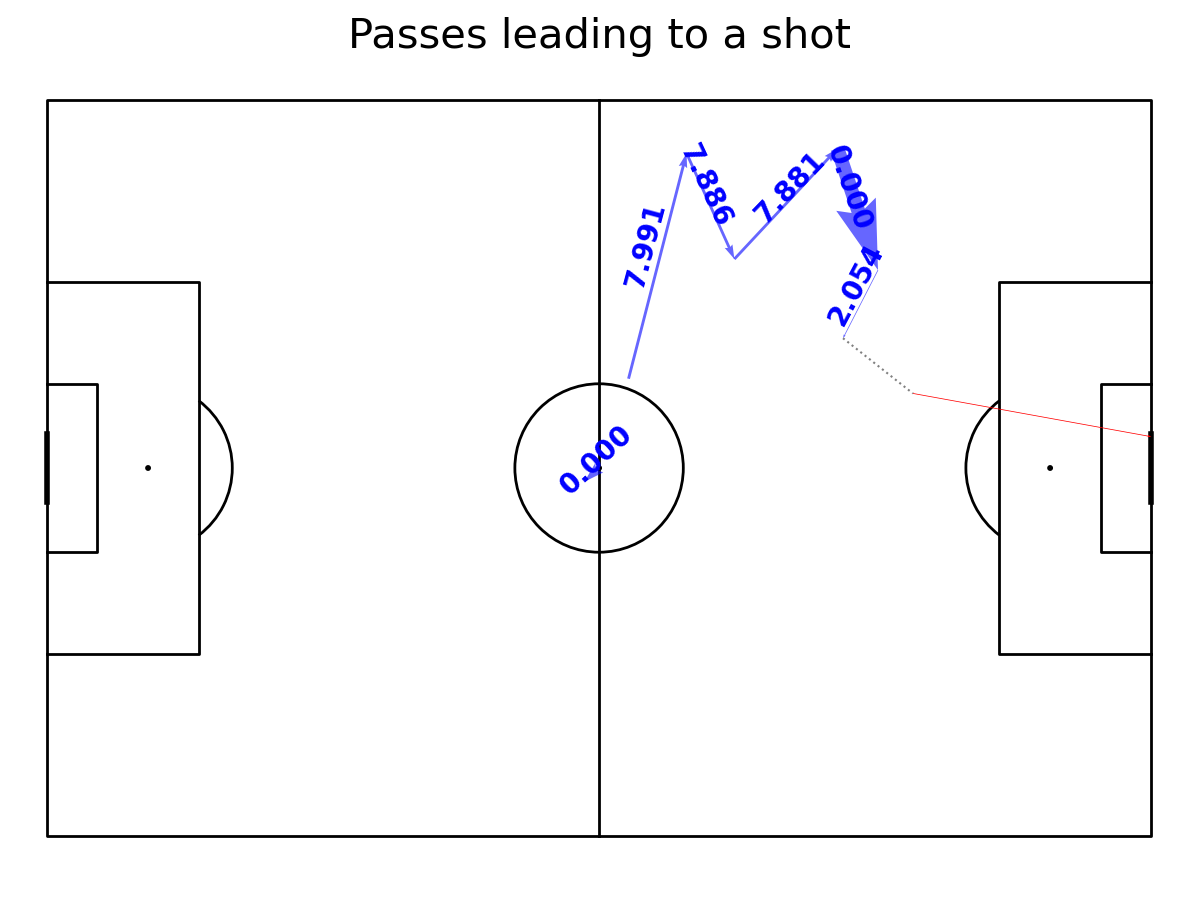

In [168]:
#plot possesion chain that ended with shot
chain = df.loc[df["possession"] == 2]
chain = chain.loc[chain["match_id"] == 3813264]

#get passes
passes_in = passes.loc[passes["possession"] == 2]
passes_in = passes_in.loc[passes_in["match_id"] == 3813264]

max_value = passes_in["xT"].max()
#get events different than pass
not_pass = chain.loc[chain["type_name"] != "Pass"].iloc[:-1]
#shot is the last event of the chain (or should be)
shot = chain.iloc[-1]
#plot
pitch = Pitch(line_color='black',pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#add size adjusted arrows
for i, row in passes_in.iterrows():
    value = row["xT"]
    #adjust the line width so that the more passes, the wider the line
    line_width = (value / max_value * 10)
    #get angle
    angle = np.arctan((row.y1-row.y0)/(row.x1-row.x0))*180/np.pi
    #plot lines on the pitch
    pitch.arrows(row.x0, row.y0, row.x1, row.y1,
                        alpha=0.6, width=line_width, zorder=2, color="blue", ax = ax["pitch"])
    #annotate text
    ax["pitch"].text((row.x0+row.x1-8)/2, (row.y0+row.y1-4)/2, str(value)[:5], fontweight = "bold", color = "blue", zorder = 4, fontsize = 20, rotation = int(angle))

#shot
pitch.arrows(shot.x0, shot.y0,
            shot.x1, shot.y1, width=line_width, color = "red", ax=ax['pitch'], zorder =  3)
#other passes like arrows
pitch.lines(not_pass.x0, not_pass.y0, not_pass.x1, not_pass.y1, color = "grey", lw = 1.5, ls = 'dotted', ax=ax['pitch'])
ax['title'].text(0.5, 0.5, 'Passes leading to a shot', ha='center', va='center', fontsize=30)
plt.show()